# General file for analyzing the results of the experiments

## Precise results of a single model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel('Results/Pipeline1/GeminiResultsTable.xlsx')                   
df2 = pd.read_excel('Results/Pipeline2/GeminiResultsTablePipeline2.xlsx')  
pd.set_option('display.max_columns', None)

In [3]:
df1

,Problem,Run,Date run,Parameter correctness,Parameter remarks,Variable correctness,Variable remarks,Objective function correctness,Objective remarks,Constraint correctness,Constraint remarks,Solution group,Solution remark,Equivalent Code Representation of Mathematical Model,Code representation remarks,Executability of Model-Related Code,Executability remarks,Code Solution Optimality,Code solution correctess remarks,Model Solution Optimality,Model solution remarks,General Remarks
0,IP1,1,2024-05-16,1,None,1,None,1,None,1,None,A,None,1,None,1,None,1,None,1,None,None
1,IP1,2,2024-05-16,1,None,1,None,1,None,1,None,A,None,1,None,1,None,1,None,1,None,"Different data format, but all good."
2,IP1,3,2024-05-16,1,None,1,None,1,None,1,None,A,None,1,None,1,None,1,None,1,None,"Different data format, but all good."
3,LP1,1,2024-05-16,1,None,1,None,1,None,0,x1=0.3x2 turned into x1/x2=0.3 - not equivalle...,A,None,1,None,0,Issues with the index definitions lead to a Ke...,0,No solution generated,1,Corrected code results in a good solution.,Model self corrects in the code with the poten...
4,LP1,2,2024-05-16,1,None,1,The model introduces 3 unnecessary variables f...,1,None,0,x1=0.3x2 turned into x1/x2=0.3 - not equivalle...,A,None,1,None,1,None,1,None,1,None,Model self corrects in the code with the poten...
5,LP1,3,2024-05-16,1,None,1,None,1,None,0,x1=0.3x2 turned into x1/x2=0.3 - not equivalle...,A,None,0,Does not use a sum function where it should. J...,0,Does not use a sum function where it should. J...,0,No solution generated,1,None,The model does not self-correct the division b...
6,MIP1,1,2024-05-16,1,None,1,None,1,None,1,None,A,None,1,None,1,None,1,None,1,None,None
7,MIP1,2,2024-05-16,1,None,1,None,1,None,1,None,A,None,1,None,1,None,1,None,1,None,None
8,MIP1,3,2024-05-16,1,None,1,None,1,None,1,None,A,None,1,None,1,None,1,None,1,None,None
9,NLP1,1,2024-05-16,1,None,1,Has an extra unnecessary variable for the numb...,1,None,0,Incorrectly implements a constraint that would...,A,None,1,None,1,None,0,Wrong solution,0,Wrong model,"A wrong constraint, leads to a solution very c..."


#### Adding a column to indicate if the entire model formulation is correct

In [4]:
df1['Mathematical model correctness'] = df1.apply(lambda row: 1 if (
    row['Variable correctness'] == 1 and 
    row['Parameter correctness'] == 1 and 
    row['Objective function correctness'] == 1 and 
    row['Constraint correctness'] == 1
) else 0, axis=1)

df2['Mathematical model correctness'] = df1.apply(lambda row: 1 if (
    row['Variable correctness'] == 1 and 
    row['Parameter correctness'] == 1 and 
    row['Objective function correctness'] == 1 and 
    row['Constraint correctness'] == 1
) else 0, axis=1)

#### Calculating the consistancy metric

In [5]:
import pandas as pd
from itertools import combinations

def calculate_consistency(df):
    problems = df['Problem'].unique()
    consistency_metrics = []

    for problem in problems:
        problem_df = df[df['Problem'] == problem]
        solution_groups = problem_df['Solution group'].values

        n = len(solution_groups)

        # Generate all unique pairs (i, j) with i < j
        pairs = combinations(range(n), 2)

        agreement_count = 0
        for i, j in pairs:
            if solution_groups[i] == solution_groups[j]:
                agreement_count += 1

        # Calculate the consistency metric for this problem
        consistency_metric = agreement_count / (n * (n - 1) / 2)
        consistency_metrics.append(consistency_metric)

    # Calculate the average consistency metric across all problems
    average_consistency = sum(consistency_metrics) / len(consistency_metrics)

    return consistency_metrics, average_consistency


consistency_metrics, average_consistency = calculate_consistency(df1)
print("Consistency metrics for each problem:", consistency_metrics)
print("Average consistency metric:", average_consistency)
print("Pipeline 2:")
consistency_metrics, average_consistency = calculate_consistency(df2)
print("Consistency metrics for each problem:", consistency_metrics)
print("Average consistency metric:", average_consistency)

Consistency metrics for each problem: [1.0, 1.0, 1.0, 0.0, 0.3333333333333333, 0.3333333333333333, 1.0, 1.0, 0.3333333333333333, 0.0, 0.3333333333333333, 0.0, 0.3333333333333333, 0.3333333333333333, 1.0, 0.3333333333333333]
Average consistency metric: 0.5208333333333333
Pipeline 2:
Consistency metrics for each problem: [1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 1.0, 0.3333333333333333, 1.0]
Average consistency metric: 0.5625


### Charts

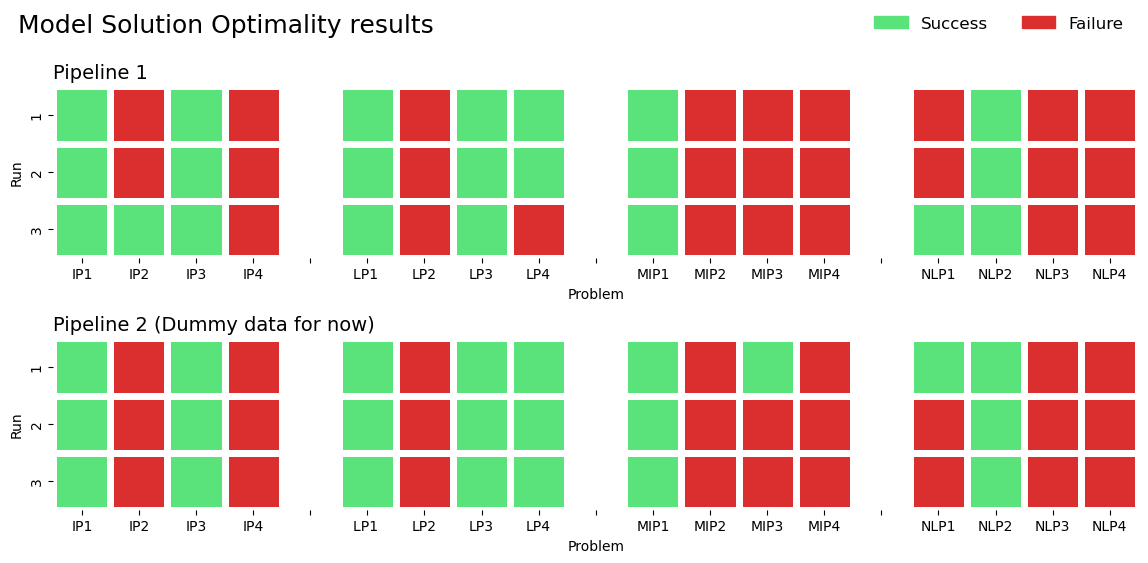

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Insert blank columns 
def insert_blank_columns(df, interval):
    columns = list(df.columns)
    new_columns = []
    for i, col in enumerate(columns):
        if i > 0 and i % interval == 0:
            new_columns.append(f'gap_{i}')
        new_columns.append(col)
    df = df.reindex(columns=new_columns)
    return df

#Preparing the data
df_chart = df1[['Problem', 'Run', 'Model Solution Optimality']]
df_chart2 = df2[['Problem', 'Run', 'Model Solution Optimality']]

# Pivot and insert columns
pivot_df_chart = df_chart.pivot(index='Run', columns='Problem', values='Model Solution Optimality')
pivot_df_chart = insert_blank_columns(pivot_df_chart, 4)

pivot_df_chart2 = df_chart2.pivot(index='Run', columns='Problem', values='Model Solution Optimality')
pivot_df_chart2 = insert_blank_columns(pivot_df_chart2, 4)

# Colors
cmap = sns.color_palette(["#db2e2e", "#5be37b"])  # Custom red and green colors

# Plotting 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6)) 

# First experiment
sns.heatmap(pivot_df_chart, cmap=cmap, cbar=False, linewidths=5, linecolor='white', square=True, 
            xticklabels=True, yticklabels=True, ax=ax1)


ax1.set_title('Pipeline 1', fontsize=14, loc='left')  # Adjusting font size and aligning to left
ax1.set_xlabel('Problem')
ax1.set_ylabel('Run')
new_labels = [label if not str(label).startswith('gap_') else '' for label in pivot_df_chart.columns]
ax1.set_xticklabels(new_labels)

# Second experiment
sns.heatmap(pivot_df_chart2, cmap=cmap, cbar=False, linewidths=5, linecolor='white', square=True, 
            xticklabels=True, yticklabels=True, ax=ax2)


ax2.set_title('Pipeline 2 (Dummy data for now)', fontsize=14, loc='left')  # Adjusting font size and aligning to left
ax2.set_xlabel('Problem')
ax2.set_ylabel('Run')
new_labels2 = [label if not str(label).startswith('gap_') else '' for label in pivot_df_chart2.columns]
ax2.set_xticklabels(new_labels2)

# Adding the overall title
fig.text(0.1, 0.95, 'Model Solution Optimality results', fontsize=18, ha='left', va='center')

# Legend
success_patch = mpatches.Patch(color='#5be37b', label='Success')
failure_patch = mpatches.Patch(color='#db2e2e', label='Failure')
fig.legend(handles=[success_patch, failure_patch], loc='upper right', bbox_to_anchor=(0.9, 0.99), ncol=2, frameon=False, fontsize=12)


plt.show()


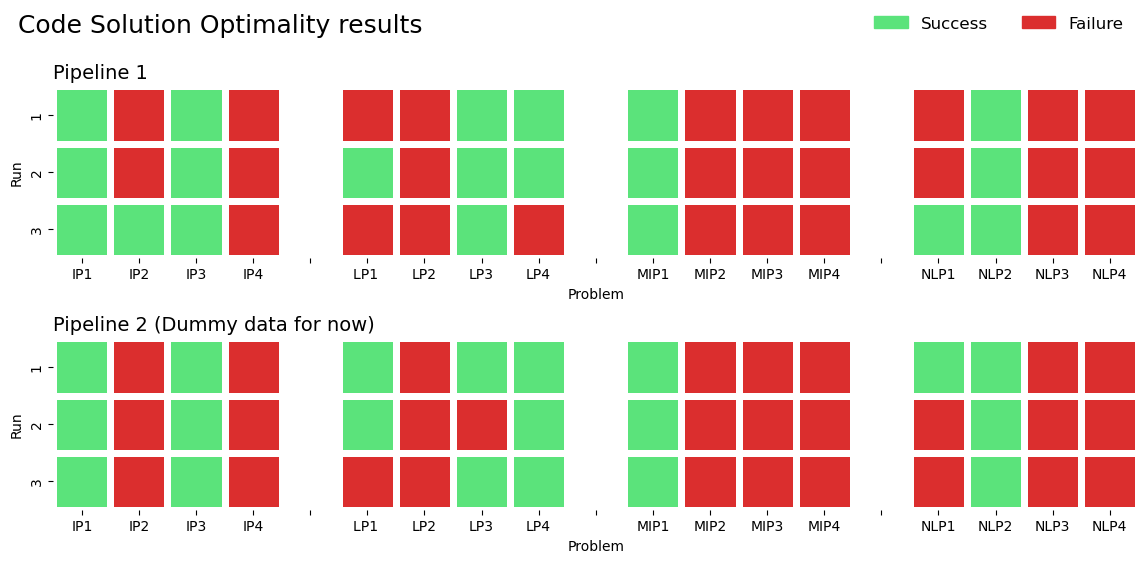

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Insert blank columns 
def insert_blank_columns(df, interval):
    columns = list(df.columns)
    new_columns = []
    for i, col in enumerate(columns):
        if i > 0 and i % interval == 0:
            new_columns.append(f'gap_{i}')
        new_columns.append(col)
    df = df.reindex(columns=new_columns)
    return df

#Preparing the data
df_chart = df1[['Problem', 'Run', 'Code Solution Optimality']]
df_chart2 = df2[['Problem', 'Run', 'Code Solution Optimality']]

# Pivot and insert columns
pivot_df_chart = df_chart.pivot(index='Run', columns='Problem', values='Code Solution Optimality')
pivot_df_chart = insert_blank_columns(pivot_df_chart, 4)

pivot_df_chart2 = df_chart2.pivot(index='Run', columns='Problem', values='Code Solution Optimality')
pivot_df_chart2 = insert_blank_columns(pivot_df_chart2, 4)

# Colors
cmap = sns.color_palette(["#db2e2e", "#5be37b"])  # Custom red and green colors

# Plotting 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6)) 

# First experiment
sns.heatmap(pivot_df_chart, cmap=cmap, cbar=False, linewidths=5, linecolor='white', square=True, 
            xticklabels=True, yticklabels=True, ax=ax1)


ax1.set_title('Pipeline 1', fontsize=14, loc='left')  # Adjusting font size and aligning to left
ax1.set_xlabel('Problem')
ax1.set_ylabel('Run')
new_labels = [label if not str(label).startswith('gap_') else '' for label in pivot_df_chart.columns]
ax1.set_xticklabels(new_labels)

# Second experiment
sns.heatmap(pivot_df_chart2, cmap=cmap, cbar=False, linewidths=5, linecolor='white', square=True, 
            xticklabels=True, yticklabels=True, ax=ax2)


ax2.set_title('Pipeline 2 (Dummy data for now)', fontsize=14, loc='left')  # Adjusting font size and aligning to left
ax2.set_xlabel('Problem')
ax2.set_ylabel('Run')
new_labels2 = [label if not str(label).startswith('gap_') else '' for label in pivot_df_chart2.columns]
ax2.set_xticklabels(new_labels2)

# Adding the overall title
fig.text(0.1, 0.95, 'Code Solution Optimality results', fontsize=18, ha='left', va='center')

# Legend
success_patch = mpatches.Patch(color='#5be37b', label='Success')
failure_patch = mpatches.Patch(color='#db2e2e', label='Failure')
fig.legend(handles=[success_patch, failure_patch], loc='upper right', bbox_to_anchor=(0.9, 0.99), ncol=2, frameon=False, fontsize=12)

plt.show()


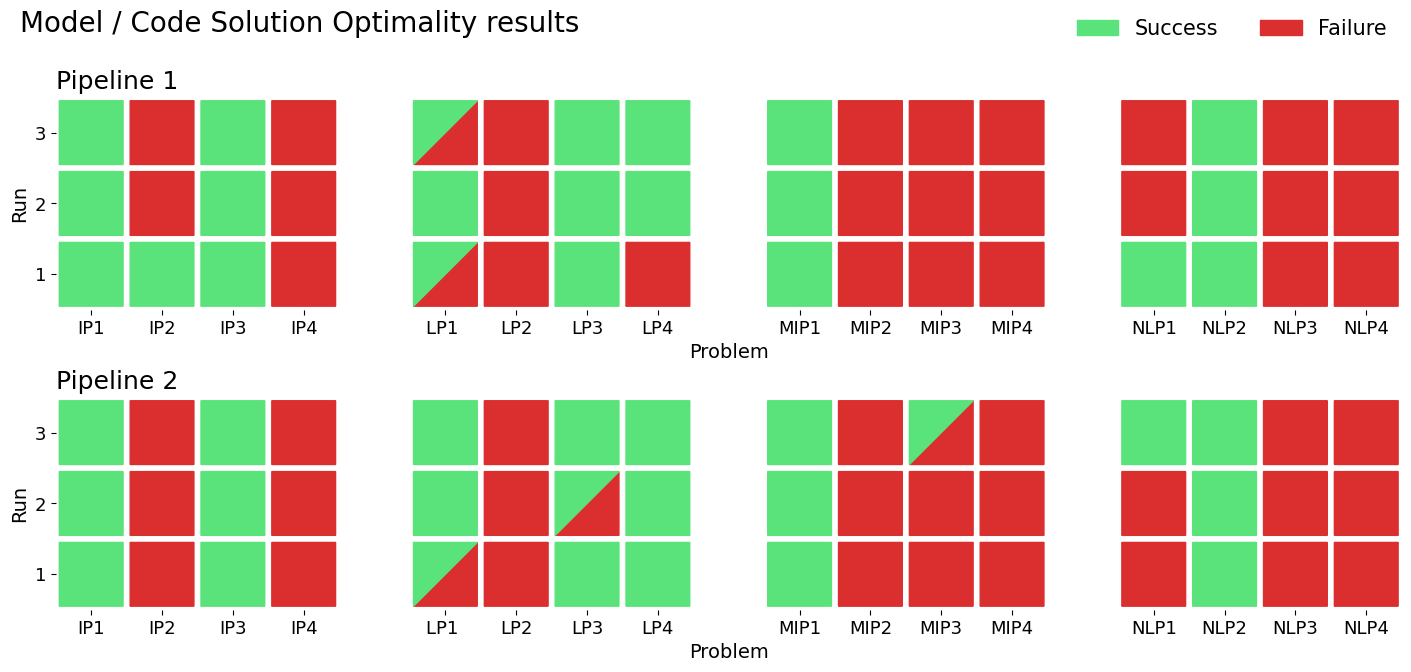

In [9]:
#Both charts combined
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Function to insert blank columns
def insert_blank_columns(df, interval):
    columns = list(df.columns)
    new_columns = []
    for i, col in enumerate(columns):
        if i > 0 and i % interval == 0:
            new_columns.append(f'gap_{i}')
        new_columns.append(col)
    df = df.reindex(columns=new_columns)
    return df

df_chart = df1[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]
df_chart2 = df2[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]

# Pivot and insert columns for both metrics
pivot_df_chart_model = df_chart.pivot(index='Run', columns='Problem', values='Model Solution Optimality')
pivot_df_chart_model = insert_blank_columns(pivot_df_chart_model, 4)
pivot_df_chart_code = df_chart.pivot(index='Run', columns='Problem', values='Code Solution Optimality')
pivot_df_chart_code = insert_blank_columns(pivot_df_chart_code, 4)

pivot_df_chart_model2 = df_chart2.pivot(index='Run', columns='Problem', values='Model Solution Optimality')
pivot_df_chart_model2 = insert_blank_columns(pivot_df_chart_model2, 4)
pivot_df_chart_code2 = df_chart2.pivot(index='Run', columns='Problem', values='Code Solution Optimality')
pivot_df_chart_code2 = insert_blank_columns(pivot_df_chart_code2, 4)

# Colors
cmap = sns.color_palette(["#db2e2e", "#5be37b"])  # Custom red and green colors

# Function to plot a split heatmap cell
def plot_split_heatmap(data_model, data_code, ax, cmap, gap=0.05):
    for i in range(data_model.shape[0]):
        for j in range(data_model.shape[1]):
            if str(data_model.columns[j]).startswith('gap_'):
                continue  # Skip gap columns
            color_model = cmap[data_model.iloc[i, j]]
            color_code = cmap[data_code.iloc[i, j]]
            # Adjusting for gap
            x = j + gap / 2
            y = data_model.shape[0] - i - 1 + gap / 2
            size = 1 - gap
            # Upper right triangle
            triangle_upper_right = plt.Polygon([[x + size, y + size], [x, y], [x + size, y]], color=color_model)
            # Lower left triangle
            triangle_lower_left = plt.Polygon([[x, y + size], [x + size, y + size], [x, y]], color=color_code)
            ax.add_patch(triangle_upper_right)
            ax.add_patch(triangle_lower_left)

# Create figure and axes with constrained layout to ensure equal spacing
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6), constrained_layout=True)

# First pipeline
plot_split_heatmap(pivot_df_chart_code, pivot_df_chart_model, ax1, cmap, gap=0.1)
ax1.set_xlim(0, pivot_df_chart_model.shape[1])
ax1.set_ylim(0, pivot_df_chart_model.shape[0])
ax1.set_aspect('equal')
ax1.set_title('Pipeline 1', fontsize=18, loc='left')
ax1.set_xlabel('Problem', fontsize=14)
ax1.set_ylabel('Run', fontsize=14)

# Center y-ticks
y_ticks = range(pivot_df_chart_model.shape[0])
y_ticklabels = range(1, pivot_df_chart_model.shape[0] + 1)
ax1.set_yticks([y + 0.5 for y in y_ticks])
ax1.set_yticklabels(y_ticklabels, fontsize = 13)

# Center x-ticks
x_ticks = [i for i, label in enumerate(pivot_df_chart_model.columns) if not str(label).startswith('gap_')]
x_ticklabels = [label for label in pivot_df_chart_model.columns if not str(label).startswith('gap_')]
ax1.set_xticks([x + 0.5 for x in x_ticks])
ax1.set_xticklabels(x_ticklabels, fontsize = 13)

# Remove the spines (the borders around the plot)
for spine in ax1.spines.values():
    spine.set_visible(False)

# Second pipeline
plot_split_heatmap(pivot_df_chart_code2,pivot_df_chart_model2, ax2, cmap, gap=0.1)
ax2.set_xlim(0, pivot_df_chart_model2.shape[1])
ax2.set_ylim(0, pivot_df_chart_model2.shape[0])
ax2.set_aspect('equal')
ax2.set_title('Pipeline 2', fontsize=18, loc='left')
ax2.set_xlabel('Problem', fontsize=14)
ax2.set_ylabel('Run', fontsize=14)

# Center y-ticks
ax2.set_yticks([y + 0.5 for y in y_ticks])
ax2.set_yticklabels(y_ticklabels, fontsize = 13)

# Center x-ticks
ax2.set_xticks([x + 0.5 for x in x_ticks])
ax2.set_xticklabels(x_ticklabels, fontsize = 13)

# Remove the spines (the borders around the plot)
for spine in ax2.spines.values():
    spine.set_visible(False)
    
# Title
fig.text(0.01, 1.07, 'Model / Code Solution Optimality results', fontsize=20, ha='left', va='center')

# Legend
success_patch = mpatches.Patch(color='#5be37b', label='Success')
failure_patch = mpatches.Patch(color='#db2e2e', label='Failure')
fig.legend(handles=[success_patch, failure_patch], loc='upper right', bbox_to_anchor=(1, 1.11), ncol=2, frameon=False, fontsize=15)

plt.show()


### Tables

### Modelling results table

In [11]:
import pandas as pd

def summarize_model_results(df1, df2):
    success_columns = [
        'Model Solution Optimality',
        'Mathematical model correctness',
        'Parameter correctness',
        'Variable correctness',
        'Objective function correctness',
        'Constraint correctness'
    ]

    def calculate_success_metrics(df):
        success_counts = {}
        success_percentages = {}
        success_percentages_3 = {}
        success_numbers_3 = {}

        for column in success_columns:
            # Results overall
            success_counts[column] = df[column].sum()
            success_percentages[column] = round((df[column].sum() / len(df[column])) * 100, 2)

            # Grouping by problem (3 runs)
            success_by_problem_3 = df.groupby('Problem')[column].any()
            # Saving number of times
            success_numbers_3[column] = success_by_problem_3.sum()
            # Saving as a percentage
            success_percentages_3[column] = (success_by_problem_3.sum() / len(success_by_problem_3)) * 100

        return success_counts, success_percentages, success_numbers_3, success_percentages_3

    # Calculate metrics for both dataframes
    metrics1 = calculate_success_metrics(df1)
    metrics2 = calculate_success_metrics(df2)

    # Create the final DataFrame with a multiindex
    summary_df = pd.DataFrame({
        ('', 'Metric'): success_columns,
        ('Pipeline 1 percentage (count)', 'All runs (48)'): [f"{metrics1[1][col]}% ({metrics1[0][col]})" for col in success_columns],
        ('Pipeline 1 percentage (count)', 'At least once (16)'): [f"{metrics1[3][col]:.2f}% ({metrics1[2][col]})" for col in success_columns],
        ('Pipeline 2 percentage (count)', 'All runs (48)'): [f"{metrics2[1][col]}% ({metrics2[0][col]})" for col in success_columns],
        ('Pipeline 2 percentage (count)', 'At least once (16)'): [f"{metrics2[3][col]:.2f}% ({metrics2[2][col]})" for col in success_columns]
    })

    # Set the multiindex
    summary_df.columns = pd.MultiIndex.from_tuples(summary_df.columns)
    
    return summary_df

In [12]:
df_m = summarize_model_results(df1,df2)
df_m

Pipeline 1 percentage (count)  \
                           Metric                 All runs (48)   
0       Model Solution Optimality                   45.83% (22)   
1  Mathematical model correctness                    37.5% (18)   
2           Parameter correctness                   83.33% (40)   
3            Variable correctness                   81.25% (39)   
4  Objective function correctness                   54.17% (26)   
5          Constraint correctness                    50.0% (24)   

                     Pipeline 2 percentage (count)                     
  At least once (16)                 All runs (48) At least once (16)  
0         56.25% (9)                   47.92% (23)         56.25% (9)  
1         43.75% (7)                    37.5% (18)         43.75% (7)  
2        93.75% (15)                   85.42% (41)        87.50% (14)  
3        93.75% (15)                   95.83% (46)       100.00% (16)  
4        68.75% (11)                   70.83% (34)        87.50% (14)  
5        62.50% (10)                   58.33% (28)        75.00% (12)

## Coding results table

In [13]:
import pandas as pd

def summarize_code_results(df1, df2):
    success_columns = [
        'Equivalent Code Representation of Mathematical Model',
        'Executability of Model-Related Code',
        'Code Solution Optimality'
    ]

    def calculate_success_metrics(df):
        success_counts = {}
        success_percentages = {}
        success_percentages_3 = {}
        success_numbers_3 = {}

        for column in success_columns:
            # Results overall
            success_counts[column] = df[column].sum()
            success_percentages[column] = round((df[column].sum() / len(df[column])) * 100, 2)

            # Grouping by problem (3 runs)
            success_by_problem_3 = df.groupby('Problem')[column].any()
            # Saving number of times
            success_numbers_3[column] = success_by_problem_3.sum()
            # Saving as a percentage
            success_percentages_3[column] = (success_by_problem_3.sum() / len(success_by_problem_3)) * 100

        return success_counts, success_percentages, success_numbers_3, success_percentages_3

    # Calculate metrics for both dataframes
    metrics1 = calculate_success_metrics(df1)
    metrics2 = calculate_success_metrics(df2)

    # Create the final DataFrame with a multiindex
    summary_df = pd.DataFrame({
        ('', 'Metric'): success_columns,
        ('Pipeline 1 percentage (count)', 'All runs (48)'): [f"{metrics1[1][col]}% ({metrics1[0][col]})" for col in success_columns],
        ('Pipeline 1 percentage (count)', 'At least once (16)'): [f"{metrics1[3][col]:.2f}% ({metrics1[2][col]})" for col in success_columns],
        ('Pipeline 2 percentage (count)', 'All runs (48)'): [f"{metrics2[1][col]}% ({metrics2[0][col]})" for col in success_columns],
        ('Pipeline 2 percentage (count)', 'At least once (16)'): [f"{metrics2[3][col]:.2f}% ({metrics2[2][col]})" for col in success_columns]
    })

    # Set the multiindex
    summary_df.columns = pd.MultiIndex.from_tuples(summary_df.columns)
    
    return summary_df

In [14]:
df_C = summarize_code_results(df1,df2)
df_C

\
                                              Metric   
0  Equivalent Code Representation of Mathematical...   
1                Executability of Model-Related Code   
2                           Code Solution Optimality   

  Pipeline 1 percentage (count)                     \
                  All runs (48) At least once (16)   
0                   79.17% (38)        93.75% (15)   
1                   56.25% (27)        68.75% (11)   
2                   41.67% (20)         56.25% (9)   

  Pipeline 2 percentage (count)                     
                  All runs (48) At least once (16)  
0                   93.75% (45)       100.00% (16)  
1                   79.17% (38)       100.00% (16)  
2                   41.67% (20)         50.00% (8)

In [15]:
def calculate_optimality(df):
    # Extract the problem type from the 'Problem' column
    df['Problem Type'] = df['Problem'].str.extract(r'([A-Za-z]+)')
    
    # Calculate the percentage of times 'Model Solution Optimality' was 1 per problem type
    optimality_summary = df.groupby('Problem Type')['Model Solution Optimality'].agg(
        optimality_percentage=lambda x: (x == 1).mean() * 100,
        success_count=lambda x: (x == 1).sum()
    ).reset_index()
    
    # Round the percentage to 1 decimal place
    optimality_summary['optimality_percentage'] = optimality_summary['optimality_percentage'].round(1)
    
    # Combine percentage and success count into a single string
    optimality_summary['Model Solution Optimality % (Count)'] = optimality_summary.apply(
        lambda row: f"{row['optimality_percentage']}% ({row['success_count']})", axis=1
    )
    
    return optimality_summary[['Problem Type', 'Model Solution Optimality % (Count)']]

# Process both DataFrames
optimality_df1 = calculate_optimality(df1)
optimality_df2 = calculate_optimality(df2)

# Rename the columns to indicate the pipeline
optimality_df1 = optimality_df1.rename(columns={'Model Solution Optimality % (Count)': 'Pipeline 1'})
optimality_df2 = optimality_df2 = optimality_df2.rename(columns={'Model Solution Optimality % (Count)': 'Pipeline 2'})

# Merge the summaries for comparison
comparison_df = pd.merge(optimality_df1, optimality_df2, on='Problem Type')

# Pivot the table to have problem types and their subtypes as columns and pipelines as rows
comparison_table = comparison_df.set_index('Problem Type').T
comparison_table.index.name = None

# Set the MultiIndex for columns
comparison_table.columns = pd.MultiIndex.from_product([["Model Solution Optimality % (Count out of 12)"], comparison_table.columns])

# Display the comparison table
comparison_table

Model Solution Optimality % (Count out of 12)             \
Problem Type                                            IP         LP   
Pipeline 1                                       58.3% (7)  66.7% (8)   
Pipeline 2                                       50.0% (6)  75.0% (9)   

                                    
Problem Type        MIP        NLP  
Pipeline 1    25.0% (3)  33.3% (4)  
Pipeline 2    33.3% (4)  33.3% (4)

# Charts comparing the models

In [17]:
RGemini1 = df1.copy()
RGemini2 = df2.copy()
RClaude1 = pd.read_excel("ResultDatasets/Claude3OpusResultsTable.xlsx", sheet_name='Measurements')
RClaude2 = pd.read_excel("ResultDatasets/Claude3OpusResultsTable 2.xlsx", sheet_name='Measurements')
RMixtral1 = pd.read_excel("ResultDatasets/Mixtral 8x22B ResultsTable.xlsx")
RMixtral2 = pd.read_excel("ResultDatasets/Mixtral 8x22B ResultsTable 2.xlsx")
RGPT1 = pd.read_excel("ResultDatasets/GPT-4 Pipeline 1 ResultsTable.xlsx")
RGPT2 = pd.read_excel("ResultDatasets/GPT-4 Pipeline 2 ResultsTable.xlsx")

In [18]:
#A dumb way but fast, just copy pasting
RGemini1['Mathematical model correctness'] = RGemini1.apply(lambda row: 1 if (
    row['Variable correctness'] == 1 and 
    row['Parameter correctness'] == 1 and 
    row['Objective function correctness'] == 1 and 
    row['Constraint correctness'] == 1
) else 0, axis=1)

RGemini2['Mathematical model correctness'] = RGemini2.apply(lambda row: 1 if (
    row['Variable correctness'] == 1 and 
    row['Parameter correctness'] == 1 and 
    row['Objective function correctness'] == 1 and 
    row['Constraint correctness'] == 1
) else 0, axis=1)

RClaude1['Mathematical model correctness'] = RClaude1.apply(lambda row: 1 if (
    row['Variable correctness'] == 1 and 
    row['Parameter correctness'] == 1 and 
    row['Objective function correctness'] == 1 and 
    row['Constraint correctness'] == 1
) else 0, axis=1)

RClaude2['Mathematical model correctness'] = RClaude2.apply(lambda row: 1 if (
    row['Variable correctness'] == 1 and 
    row['Parameter correctness'] == 1 and 
    row['Objective function correctness'] == 1 and 
    row['Constraint correctness'] == 1
) else 0, axis=1)

RMixtral1['Mathematical model correctness'] = RMixtral1.apply(lambda row: 1 if (
    row['Variable correctness'] == 1 and 
    row['Parameter correctness'] == 1 and 
    row['Objective function correctness'] == 1 and 
    row['Constraint correctness'] == 1
) else 0, axis=1)

RMixtral2['Mathematical model correctness'] = RMixtral2.apply(lambda row: 1 if (
    row['Variable correctness'] == 1 and 
    row['Parameter correctness'] == 1 and 
    row['Objective function correctness'] == 1 and 
    row['Constraint correctness'] == 1
) else 0, axis=1)

RGPT1['Mathematical model correctness'] = RGPT1.apply(lambda row: 1 if (
    row['Variable correctness'] == 1 and 
    row['Parameter correctness'] == 1 and 
    row['Objective function correctness'] == 1 and 
    row['Constraint correctness'] == 1
) else 0, axis=1)

RGPT2['Mathematical model correctness'] = RGPT2.apply(lambda row: 1 if (
    row['Variable correctness'] == 1 and 
    row['Parameter correctness'] == 1 and 
    row['Objective function correctness'] == 1 and 
    row['Constraint correctness'] == 1
) else 0, axis=1)


In [19]:
RClaude1

,Problem,Run,Date run,Parameter correctness,Parameter remarks,Variable correctness,Variable remarks,Objective function correctness,Objective remarks,Constraint correctness,Constraint remarks,Whole Model Correctness,Model Correctness,Solution group,Solution remark,Equivalent Code Representation of Mathematical Model,Code representation remarks,Executability of Model-Related Code,Solver,Solver comments,Executability remarks,Error Messages,Executability reason,Code Solution Optimality,Code solution correctess remarks,Model Solution Optimality,Model solution remarks,General Remarks,Mathematical model correctness
0,LP1,1,2024-05-16,1,Seperate Parameters:\nDefined parameters on to...,1,Used three distinct variables (one for each co...,1,NaN,1,NaN,1,1,A,NaN,1,NaN,1,glpk,NaN,Used def and pyo.Constraint with rule parameter,NaN,NaN,1,NaN,1,NaN,NaN,1
1,LP1,2,2024-05-16,1,Seperate Parameters:\nDefined parameters on to...,1,Used three distinct variables (one for each co...,1,NaN,0,"Essentially correct, but in ratio constraints ...",0,0,B,NaN,1,NaN,0,glpk,Because of nonlinear constraints glpk not appl...,Used def and pyo.Constraint with rule parameter,ValueError: Model constraint (crit_elem_GCA) c...,incorrect use of solver,0,NaN,1,Correct optimal value\nDifferent optimal Solution,NaN,0
2,LP1,3,2024-05-16,1,Seperate Parameters:\nDefined parameters on to...,1,Used only one variables with indices,1,NaN,1,NaN,1,1,A,NaN,1,NaN,1,glpk,NaN,Used def and pyo.Constraint with rule parameter,NaN,NaN,1,NaN,1,NaN,NaN,1
3,LP2,1,2024-05-16,0,Additional parameter for general production ca...,1,NaN,1,Used summation and indices,0,Added a general production capacity constraint...,0,0,A,NaN,1,NaN,1,glpk,NaN,Used def and pyo.Constraint with rule parameter,NaN,NaN,0,NaN,0,NaN,General remarks LP2:\nCorrectly handled robust...,0
4,LP2,2,2024-05-16,0,Additional parameters for storage per raw mate...,1,NaN,1,Used summation and indices,0,Made a seperate constraint for each drug regar...,0,0,B,NaN,1,NaN,1,glpk,NaN,Used pyo.Constraint with expr parameter\nUsed ...,NaN,NaN,0,NaN,0,Same solution as run 1,General remarks LP2:\nCorrectly handled robust...,0
5,LP2,3,2024-05-16,0,Additional parameter for general production ca...,1,NaN,1,Used summation and indices,0,Added a general production capacity constraint...,0,0,A,NaN,1,NaN,1,glpk,NaN,Used def and pyo.Constraint with rule parameter,NaN,NaN,0,NaN,0,NaN,General remarks LP2:\nCorrectly handled robust...,0
6,LP3,1,2024-05-16,1,Correctly identified parameters\nDid not inclu...,1,NaN,1,NaN,1,NaN,1,1,A,NaN,1,NaN,1,glpk,NaN,Used pyo.Constraint with expr parameter,NaN,NaN,1,NaN,1,NaN,NaN,1
7,LP3,2,2024-05-16,1,Used parameter values in mathematical formulation,1,Different from our solution:\nX: Total amount ...,1,NaN,1,NaN,1,1,B,NaN,1,NaN,1,glpk,NaN,Used pyo.Constraint with expr parameter,NaN,NaN,1,NaN,1,NaN,NaN,1
8,LP3,3,2024-05-16,1,Correctly identified parameters\nDid not inclu...,1,Same as in run 2\nAlso defined S3 and then co...,1,NaN,1,Additional constraint that sets y3 (subcontrac...,1,1,C (?) or B,NaN,1,NaN,1,glpk,NaN,Used def and pyo.Constraint with rule parameter,NaN,NaN,1,NaN,1,NaN,NaN,1
9,LP4,1,2024-05-16,1,NaN,1,Misses variables for units of wheat/ corn/ sug...,1,Uses max and min functions in objective functi...,0,Uses equality constraint for sugar beet quota\...,0,0,A,NaN,1,NaN,0,glpk,NaN,Used def and pyo.Constraint with rule paramet...,PyomoException: Cannot convert non-constant Py...,incorrect use of Pyomo syntax (logic operator ...,0,NaN,1,Logic is correct;\nRequired reformulation in code,NaN,0


In [20]:
import pandas as pd

def summarize_all_results(df1,df2):
    model_success_columns = [
        'Model Solution Optimality',
        'Mathematical model correctness',
        'Parameter correctness',
        'Variable correctness',
        'Objective function correctness',
        'Constraint correctness'
    ]

    code_success_columns = [
        'Equivalent Code Representation of Mathematical Model',
        'Executability of Model-Related Code',
        'Code Solution Optimality'
    ]

    def calculate_success_metrics(df, success_columns):
        success_counts = {}
        success_percentages = {}
        success_percentages_3 = {}
        success_numbers_3 = {}

        for column in success_columns:
            # Results overall
            success_counts[column] = df[column].sum()
            success_percentages[column] = round((df[column].sum() / len(df[column])) * 100, 2)

            # Grouping by problem (3 runs)
            success_by_problem_3 = df.groupby('Problem')[column].any()
            # Saving number of times
            success_numbers_3[column] = success_by_problem_3.sum()
            # Saving as a percentage
            success_percentages_3[column] = (success_by_problem_3.sum() / len(success_by_problem_3)) * 100

        return success_counts, success_percentages, success_numbers_3, success_percentages_3

    # Calculate metrics for both dataframes
    metrics1_model = calculate_success_metrics(df1, model_success_columns)
    metrics2_model = calculate_success_metrics(df2, model_success_columns)
    metrics1_code = calculate_success_metrics(df1, code_success_columns)
    metrics2_code = calculate_success_metrics(df2, code_success_columns)

    # Create the final DataFrame with a multiindex
    summary_df_model = pd.DataFrame({
        ('', 'Metric'): model_success_columns,
        ('Pipeline 1 percentage (count)', 'All runs (48)'): [f"{metrics1_model[1][col]}% ({metrics1_model[0][col]})" for col in model_success_columns],
        ('Pipeline 1 percentage (count)', 'At least once (16)'): [f"{metrics1_model[3][col]:.2f}% ({metrics1_model[2][col]})" for col in model_success_columns],
        ('Pipeline 2 percentage (count)', 'All runs (48)'): [f"{metrics2_model[1][col]}% ({metrics2_model[0][col]})" for col in model_success_columns],
        ('Pipeline 2 percentage (count)', 'At least once (16)'): [f"{metrics2_model[3][col]:.2f}% ({metrics2_model[2][col]})" for col in model_success_columns]
    })

    summary_df_code = pd.DataFrame({
        ('', 'Metric'): code_success_columns,
        ('Pipeline 1 percentage (count)', 'All runs (48)'): [f"{metrics1_code[1][col]}% ({metrics1_code[0][col]})" for col in code_success_columns],
        ('Pipeline 1 percentage (count)', 'At least once (16)'): [f"{metrics1_code[3][col]:.2f}% ({metrics1_code[2][col]})" for col in code_success_columns],
        ('Pipeline 2 percentage (count)', 'All runs (48)'): [f"{metrics2_code[1][col]}% ({metrics2_code[0][col]})" for col in code_success_columns],
        ('Pipeline 2 percentage (count)', 'At least once (16)'): [f"{metrics2_code[3][col]:.2f}% ({metrics2_code[2][col]})" for col in code_success_columns]
    })

    # Combine both summaries into a single DataFrame
    summary_df = pd.concat([summary_df_model, summary_df_code], ignore_index=True)

    # Set the multiindex for the combined DataFrame
    summary_df.columns = pd.MultiIndex.from_tuples(summary_df.columns)

    return summary_df

In [21]:
RGemini = summarize_all_results(RGemini1,RGemini2)
RClaude = summarize_all_results(RClaude1,RClaude2)
RMixtral = summarize_all_results(RMixtral1,RMixtral2)
RGPT = summarize_all_results(RGPT1,RGPT2)

In [22]:
RGemini

\
                                              Metric   
0                          Model Solution Optimality   
1                     Mathematical model correctness   
2                              Parameter correctness   
3                               Variable correctness   
4                     Objective function correctness   
5                             Constraint correctness   
6  Equivalent Code Representation of Mathematical...   
7                Executability of Model-Related Code   
8                           Code Solution Optimality   

  Pipeline 1 percentage (count)                     \
                  All runs (48) At least once (16)   
0                   45.83% (22)         56.25% (9)   
1                    37.5% (18)         43.75% (7)   
2                   83.33% (40)        93.75% (15)   
3                   81.25% (39)        93.75% (15)   
4                   54.17% (26)        68.75% (11)   
5                    50.0% (24)        62.50% (10)   
6                   79.17% (38)        93.75% (15)   
7                   56.25% (27)        68.75% (11)   
8                   41.67% (20)         56.25% (9)   

  Pipeline 2 percentage (count)                     
                  All runs (48) At least once (16)  
0                   47.92% (23)         56.25% (9)  
1                   45.83% (22)         56.25% (9)  
2                   85.42% (41)        87.50% (14)  
3                   95.83% (46)       100.00% (16)  
4                   70.83% (34)        87.50% (14)  
5                   58.33% (28)        75.00% (12)  
6                   93.75% (45)       100.00% (16)  
7                   79.17% (38)       100.00% (16)  
8                   41.67% (20)         50.00% (8)

In [23]:
RClaude

\
                                              Metric   
0                          Model Solution Optimality   
1                     Mathematical model correctness   
2                              Parameter correctness   
3                               Variable correctness   
4                     Objective function correctness   
5                             Constraint correctness   
6  Equivalent Code Representation of Mathematical...   
7                Executability of Model-Related Code   
8                           Code Solution Optimality   

  Pipeline 1 percentage (count)                     \
                  All runs (48) At least once (16)   
0                   47.92% (23)         56.25% (9)   
1                   41.67% (20)         56.25% (9)   
2                   89.58% (43)        93.75% (15)   
3                   83.33% (40)        87.50% (14)   
4                   85.42% (41)        87.50% (14)   
5                   43.75% (21)         56.25% (9)   
6                   93.75% (45)       100.00% (16)   
7                   72.92% (35)        93.75% (15)   
8                   41.67% (20)         50.00% (8)   

  Pipeline 2 percentage (count)                     
                  All runs (48) At least once (16)  
0                   54.17% (26)         56.25% (9)  
1                   45.83% (22)         50.00% (8)  
2                   81.25% (39)        93.75% (15)  
3                   89.58% (43)        93.75% (15)  
4                    75.0% (36)        87.50% (14)  
5                    50.0% (24)         56.25% (9)  
6                   85.42% (41)        93.75% (15)  
7                    62.5% (30)        87.50% (14)  
8                   45.83% (22)         50.00% (8)

In [24]:
RMixtral

\
                                              Metric   
0                          Model Solution Optimality   
1                     Mathematical model correctness   
2                              Parameter correctness   
3                               Variable correctness   
4                     Objective function correctness   
5                             Constraint correctness   
6  Equivalent Code Representation of Mathematical...   
7                Executability of Model-Related Code   
8                           Code Solution Optimality   

  Pipeline 1 percentage (count)                     \
                  All runs (48) At least once (16)   
0                    16.67% (8)         25.00% (4)   
1                     2.08% (1)          6.25% (1)   
2                   85.42% (41)        93.75% (15)   
3                    37.5% (18)         43.75% (7)   
4                   52.08% (25)        62.50% (10)   
5                     8.33% (4)         18.75% (3)   
6                   83.33% (40)       100.00% (16)   
7                   41.67% (20)        62.50% (10)   
8                    16.67% (8)         25.00% (4)   

  Pipeline 2 percentage (count)                     
                  All runs (48) At least once (16)  
0                   22.92% (11)         37.50% (6)  
1                    14.58% (7)         25.00% (4)  
2                   72.92% (35)        87.50% (14)  
3                   54.17% (26)        62.50% (10)  
4                   58.33% (28)        68.75% (11)  
5                   22.92% (11)         37.50% (6)  
6                 83.33% (40.0)       100.00% (16)  
7                   27.08% (13)         43.75% (7)  
8                   20.83% (10)         37.50% (6)

In [25]:
RGPT

\
                                              Metric   
0                          Model Solution Optimality   
1                     Mathematical model correctness   
2                              Parameter correctness   
3                               Variable correctness   
4                     Objective function correctness   
5                             Constraint correctness   
6  Equivalent Code Representation of Mathematical...   
7                Executability of Model-Related Code   
8                           Code Solution Optimality   

  Pipeline 1 percentage (count)                     \
                  All runs (48) At least once (16)   
0                   20.83% (10)         43.75% (7)   
1                     6.25% (3)         18.75% (3)   
2                   83.33% (40)        93.75% (15)   
3                    50.0% (24)        75.00% (12)   
4                    50.0% (24)        62.50% (10)   
5                    10.42% (5)         25.00% (4)   
6                   60.42% (29)        81.25% (13)   
7                   56.25% (27)        93.75% (15)   
8                    14.58% (7)         37.50% (6)   

  Pipeline 2 percentage (count)                     
                  All runs (48) At least once (16)  
0                   20.83% (10)         37.50% (6)  
1                     8.33% (4)         25.00% (4)  
2                   85.42% (41)        93.75% (15)  
3                   54.17% (26)        75.00% (12)  
4                   47.92% (23)        75.00% (12)  
5                    16.67% (8)         31.25% (5)  
6                   58.33% (28)        81.25% (13)  
7                   54.17% (26)        87.50% (14)  
8                    16.67% (8)         31.25% (5)

In [78]:
import pandas as pd

def summarize_all_models(df_gemini_1, df_gemini_2, df_gpt_1, df_gpt_2, df_mixtral_1, df_mixtral_2, df_claude_1, df_claude_2):
    model_success_columns = [
        'Model Solution Optimality',
        'Mathematical model correctness',
        'Parameter correctness',
        'Variable correctness',
        'Objective function correctness',
        'Constraint correctness'
    ]

    code_success_columns = [
        'Equivalent Code Representation of Mathematical Model',
        'Executability of Model-Related Code',
        'Code Solution Optimality'
    ]

    def calculate_success_metrics(df, success_columns):
        success_counts = {}
        success_percentages = {}

        for column in success_columns:
            success_counts[column] = df[column].sum()
            success_percentages[column] = round((df[column].sum() / len(df[column])) * 100, 2)

        return success_counts, success_percentages

    # Dictionary to hold dataframes for easier iteration
    dataframes = {
        ('Pipeline 1', 'Claude'): df_claude_1,
        ('Pipeline 1', 'Gemini'): df_gemini_1,
        ('Pipeline 1', 'Mixtral'): df_mixtral_1,
        ('Pipeline 1', 'GPT'): df_gpt_1,
        ('Pipeline 2', 'Claude'): df_claude_2,
        ('Pipeline 2', 'Gemini'): df_gemini_2,
        ('Pipeline 2', 'Mixtral'): df_mixtral_2,
        ('Pipeline 2', 'GPT'): df_gpt_2
        
    }

    # Create summary dataframes
    summary_data_model = {('', 'Model'): model_success_columns}
    summary_data_code = {('', 'Model'): code_success_columns}

    for (pipeline, model), df in dataframes.items():
        metrics_model = calculate_success_metrics(df, model_success_columns)
        metrics_code = calculate_success_metrics(df, code_success_columns)
        
        for col in model_success_columns:
            summary_data_model.setdefault((pipeline, model), []).append(f"{metrics_model[1][col]}% ({metrics_model[0][col]})")
        
        for col in code_success_columns:
            summary_data_code.setdefault((pipeline, model), []).append(f"{metrics_code[1][col]}% ({metrics_code[0][col]})")

    summary_df_model = pd.DataFrame(summary_data_model)
    summary_df_code = pd.DataFrame(summary_data_code)

    # Combine both summaries into a single DataFrame
    summary_df = pd.concat([summary_df_model, summary_df_code], ignore_index=True)

    # Set the multiindex for the combined DataFrame
    summary_df.columns = pd.MultiIndex.from_tuples(summary_df.columns)

    return summary_df

# Usage example with 8 dataframes:
summarize_all_models(RGemini1, RGemini2, RGPT1, RGPT2, RMixtral1, RMixtral2,RClaude1, RClaude2)


Pipeline 1  \
                                               Model       Claude   
0                          Model Solution Optimality  47.92% (23)   
1                     Mathematical model correctness  41.67% (20)   
2                              Parameter correctness  89.58% (43)   
3                               Variable correctness  83.33% (40)   
4                     Objective function correctness  85.42% (41)   
5                             Constraint correctness  43.75% (21)   
6  Equivalent Code Representation of Mathematical...  93.75% (45)   
7                Executability of Model-Related Code  72.92% (35)   
8                           Code Solution Optimality  41.67% (20)   

                                           Pipeline 2               \
        Gemini      Mixtral          GPT       Claude       Gemini   
0  45.83% (22)   16.67% (8)  20.83% (10)  54.17% (26)  47.92% (23)   
1   37.5% (18)    2.08% (1)    6.25% (3)  45.83% (22)  45.83% (22)   
2  83.33% (40)  85.42% (41)  83.33% (40)  81.25% (39)  85.42% (41)   
3  81.25% (39)   37.5% (18)   50.0% (24)  89.58% (43)  95.83% (46)   
4  54.17% (26)  52.08% (25)   50.0% (24)   75.0% (36)  70.83% (34)   
5   50.0% (24)    8.33% (4)   10.42% (5)   50.0% (24)  58.33% (28)   
6  79.17% (38)  83.33% (40)  60.42% (29)  85.42% (41)  93.75% (45)   
7  56.25% (27)  41.67% (20)  56.25% (27)   62.5% (30)  79.17% (38)   
8  41.67% (20)   16.67% (8)   14.58% (7)  45.83% (22)  41.67% (20)   

                               
         Mixtral          GPT  
0    22.92% (11)  20.83% (10)  
1     14.58% (7)    8.33% (4)  
2    72.92% (35)  85.42% (41)  
3    54.17% (26)  54.17% (26)  
4    58.33% (28)  47.92% (23)  
5    22.92% (11)   16.67% (8)  
6  83.33% (40.0)  58.33% (28)  
7    27.08% (13)  54.17% (26)  
8    20.83% (10)   16.67% (8)

In [26]:
import pandas as pd
from itertools import combinations

print("Gemini Pipeline 1:")
consistency_metrics, average_consistency = calculate_consistency(df1)
#print("Consistency metrics for each problem:", consistency_metrics)
print("Average consistency metric:", average_consistency)


print("Gemini Pipeline 2:")
consistency_metrics, average_consistency = calculate_consistency(df2)
#print("Consistency metrics for each problem:", consistency_metrics)
print("Average consistency metric:", average_consistency)

print("Claude Pipeline 1:")
consistency_metrics, average_consistency = calculate_consistency(RClaude1)
#print("Consistency metrics for each problem:", consistency_metrics)
print("Average consistency metric:", average_consistency)


print("Claude Pipeline 2:")
consistency_metrics, average_consistency = calculate_consistency(RClaude2)
#print("Consistency metrics for each problem:", consistency_metrics)
print("Average consistency metric:", average_consistency)

print("Mixtral Pipeline 1:")
consistency_metrics, average_consistency = calculate_consistency(RMixtral1)
#print("Consistency metrics for each problem:", consistency_metrics)
print("Average consistency metric:", average_consistency)


print("Mixtral Pipeline 2:")
consistency_metrics, average_consistency = calculate_consistency(RMixtral2)
#print("Consistency metrics for each problem:", consistency_metrics)
print("Average consistency metric:", average_consistency)

print("GPT Pipeline 1:")
consistency_metrics, average_consistency = calculate_consistency(RGPT1)
#print("Consistency metrics for each problem:", consistency_metrics)
print("Average consistency metric:", average_consistency)


print("GPT Pipeline 2:")
consistency_metrics, average_consistency = calculate_consistency(RGPT2)
#print("Consistency metrics for each problem:", consistency_metrics)
print("Average consistency metric:", average_consistency)

Gemini Pipeline 1:
Average consistency metric: 0.5208333333333333
Gemini Pipeline 2:
Average consistency metric: 0.5625
Claude Pipeline 1:
Average consistency metric: 0.35416666666666663
Claude Pipeline 2:
Average consistency metric: 0.3333333333333333
Mixtral Pipeline 1:
Average consistency metric: 0.12499999999999999
Mixtral Pipeline 2:
Average consistency metric: 0.020833333333333332
GPT Pipeline 1:
Average consistency metric: 0.0
GPT Pipeline 2:
Average consistency metric: 0.0625


In [27]:
dMSO = {'Pipeline1':{'Gemini':0.4583,'Claude':0.4792,'Mixtral':0.1667,'GPT-4':0.2083},
        'Pipeline2':{'Gemini':0.4792,'Claude':0.5417,'Mixtral':0.2292,'GPT-4':0.2292},}

dCSO = {'Pipeline1':{'Gemini':0.4167,'Claude':0.4167,'Mixtral':0.1667,'GPT-4':0.1458},
        'Pipeline2':{'Gemini':0.4167,'Claude':0.4583,'Mixtral':0.2083,'GPT-4':0.1875},}

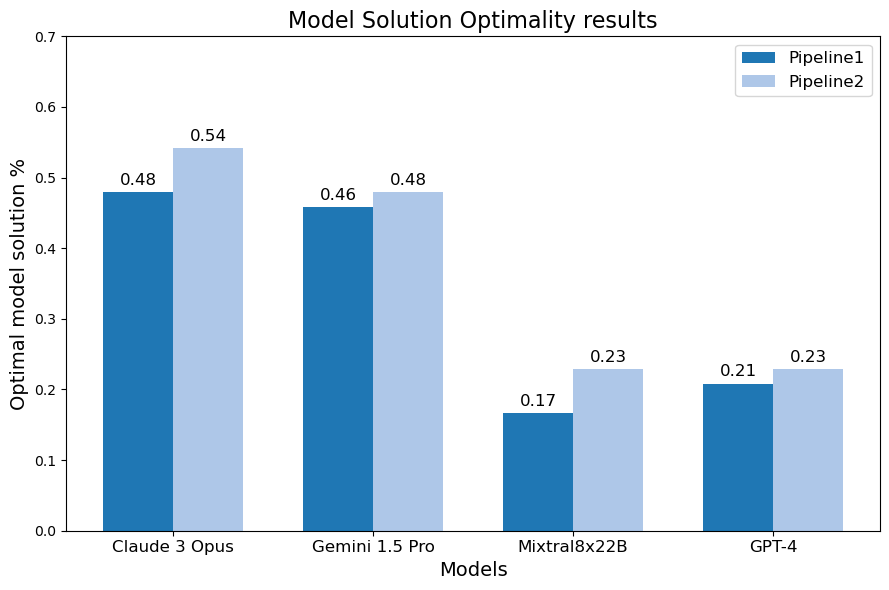

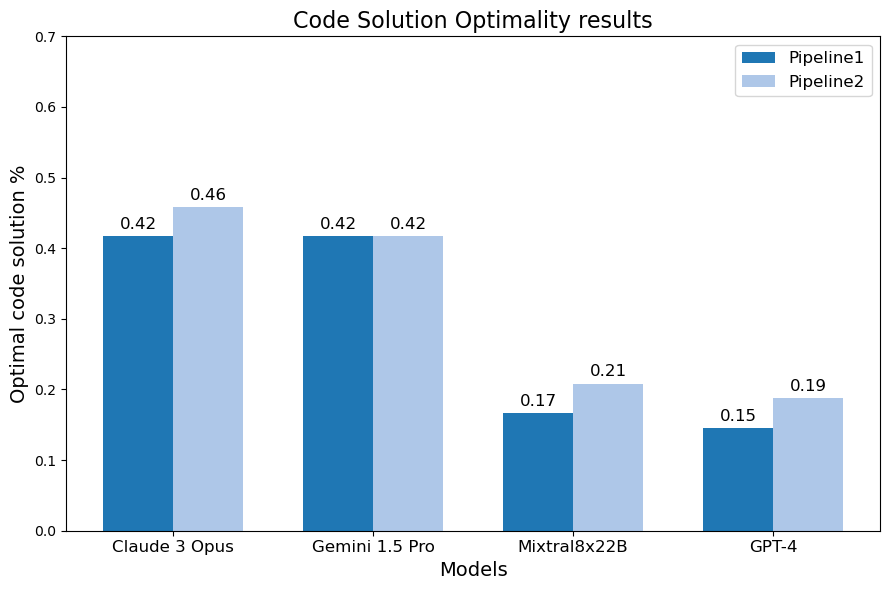

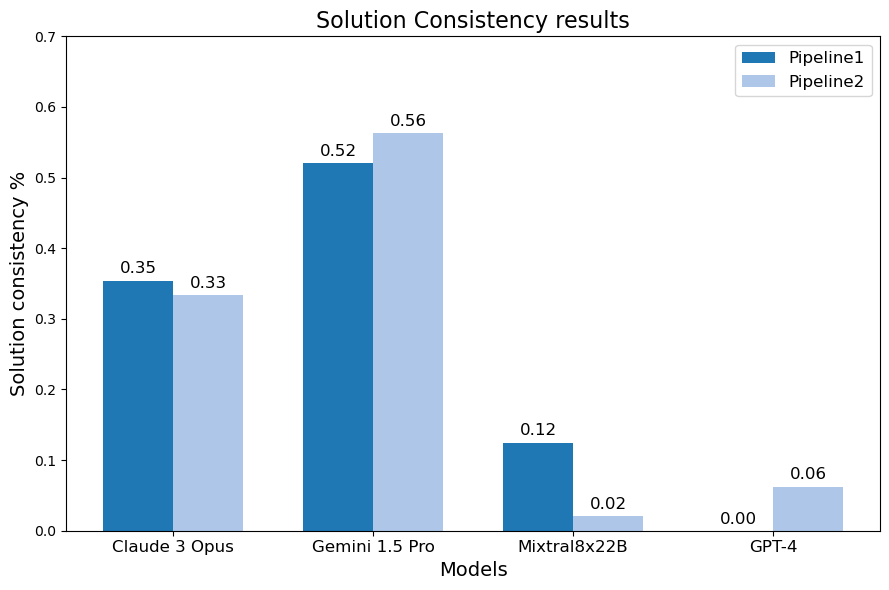

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Data
dMSO = {
    'Pipeline1': {'Claude 3 Opus': 0.4792, 'Gemini 1.5 Pro': 0.4583, 'Mixtral8x22B': 0.1667, 'GPT-4': 0.2083},
    'Pipeline2': {'Claude 3 Opus': 0.5417, 'Gemini 1.5 Pro': 0.4792, 'Mixtral8x22B': 0.2292, 'GPT-4': 0.2292},
}

dCSO = {
    'Pipeline1': {'Claude 3 Opus': 0.4167, 'Gemini 1.5 Pro': 0.4167, 'Mixtral8x22B': 0.1667, 'GPT-4': 0.1458},
    'Pipeline2': {'Claude 3 Opus': 0.4583, 'Gemini 1.5 Pro': 0.4167, 'Mixtral8x22B': 0.2083, 'GPT-4': 0.1875},
}

dCons = {
    'Pipeline1': {'Claude 3 Opus': 0.3542, 'Gemini 1.5 Pro': 0.5208, 'Mixtral8x22B': 0.1249, 'GPT-4': 0.0000},
    'Pipeline2': {'Claude 3 Opus': 0.3333, 'Gemini 1.5 Pro': 0.5625, 'Mixtral8x22B': 0.0208, 'GPT-4': 0.0625},
}


# Extracting the data
models = list(dMSO['Pipeline1'].keys())
pipeline1_MSO_scores = [dMSO['Pipeline1'][model] for model in models]
pipeline2_MSO_scores = [dMSO['Pipeline2'][model] for model in models]
pipeline1_CSO_scores = [dCSO['Pipeline1'][model] for model in models]
pipeline2_CSO_scores = [dCSO['Pipeline2'][model] for model in models]
pipeline1_consistency = [dCons['Pipeline1'][model] for model in models]
pipeline2_consistency = [dCons['Pipeline2'][model] for model in models]

# Setting the positions and width for the bars
x = np.arange(len(models))
width = 0.35

# Navy theme colors
color_pipeline1 = '#1f77b4'  # Dark blue
color_pipeline2 = '#aec7e8'  # Light blue

# Function to create the bar plots
def create_bar_plot(ax, scores1, scores2, ylabel, title):
    bars1 = ax.bar(x - width/2, scores1, width, label='Pipeline1', color=color_pipeline1)
    bars2 = ax.bar(x + width/2, scores2, width, label='Pipeline2', color=color_pipeline2)

    ax.set_xlabel('Models', fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(models, fontsize=12)
    ax.legend(fontsize=12)

    # Setting y-axis limit to [0, 0.7]
    ax.set_ylim(0, 0.7)

    # Displaying the values on top of the bars
    def autolabel(ax, bars):
        """Attach a text label above each bar in *bars*, displaying its height."""
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=12)

    autolabel(ax, bars1)
    autolabel(ax, bars2)

# Plotting the MSO scores
fig, ax1 = plt.subplots(figsize=(9, 6))
create_bar_plot(ax1, pipeline1_MSO_scores, pipeline2_MSO_scores, 'Optimal model solution %', 'Model Solution Optimality results')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plotting the CSO scores
fig, ax2 = plt.subplots(figsize=(9, 6))
create_bar_plot(ax2, pipeline1_CSO_scores, pipeline2_CSO_scores, 'Optimal code solution %', 'Code Solution Optimality results')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plotting the consistancy
fig, ax2 = plt.subplots(figsize=(9, 6))
create_bar_plot(ax2, pipeline1_consistency, pipeline2_consistency, 'Solution consistency %', 'Solution Consistency results')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


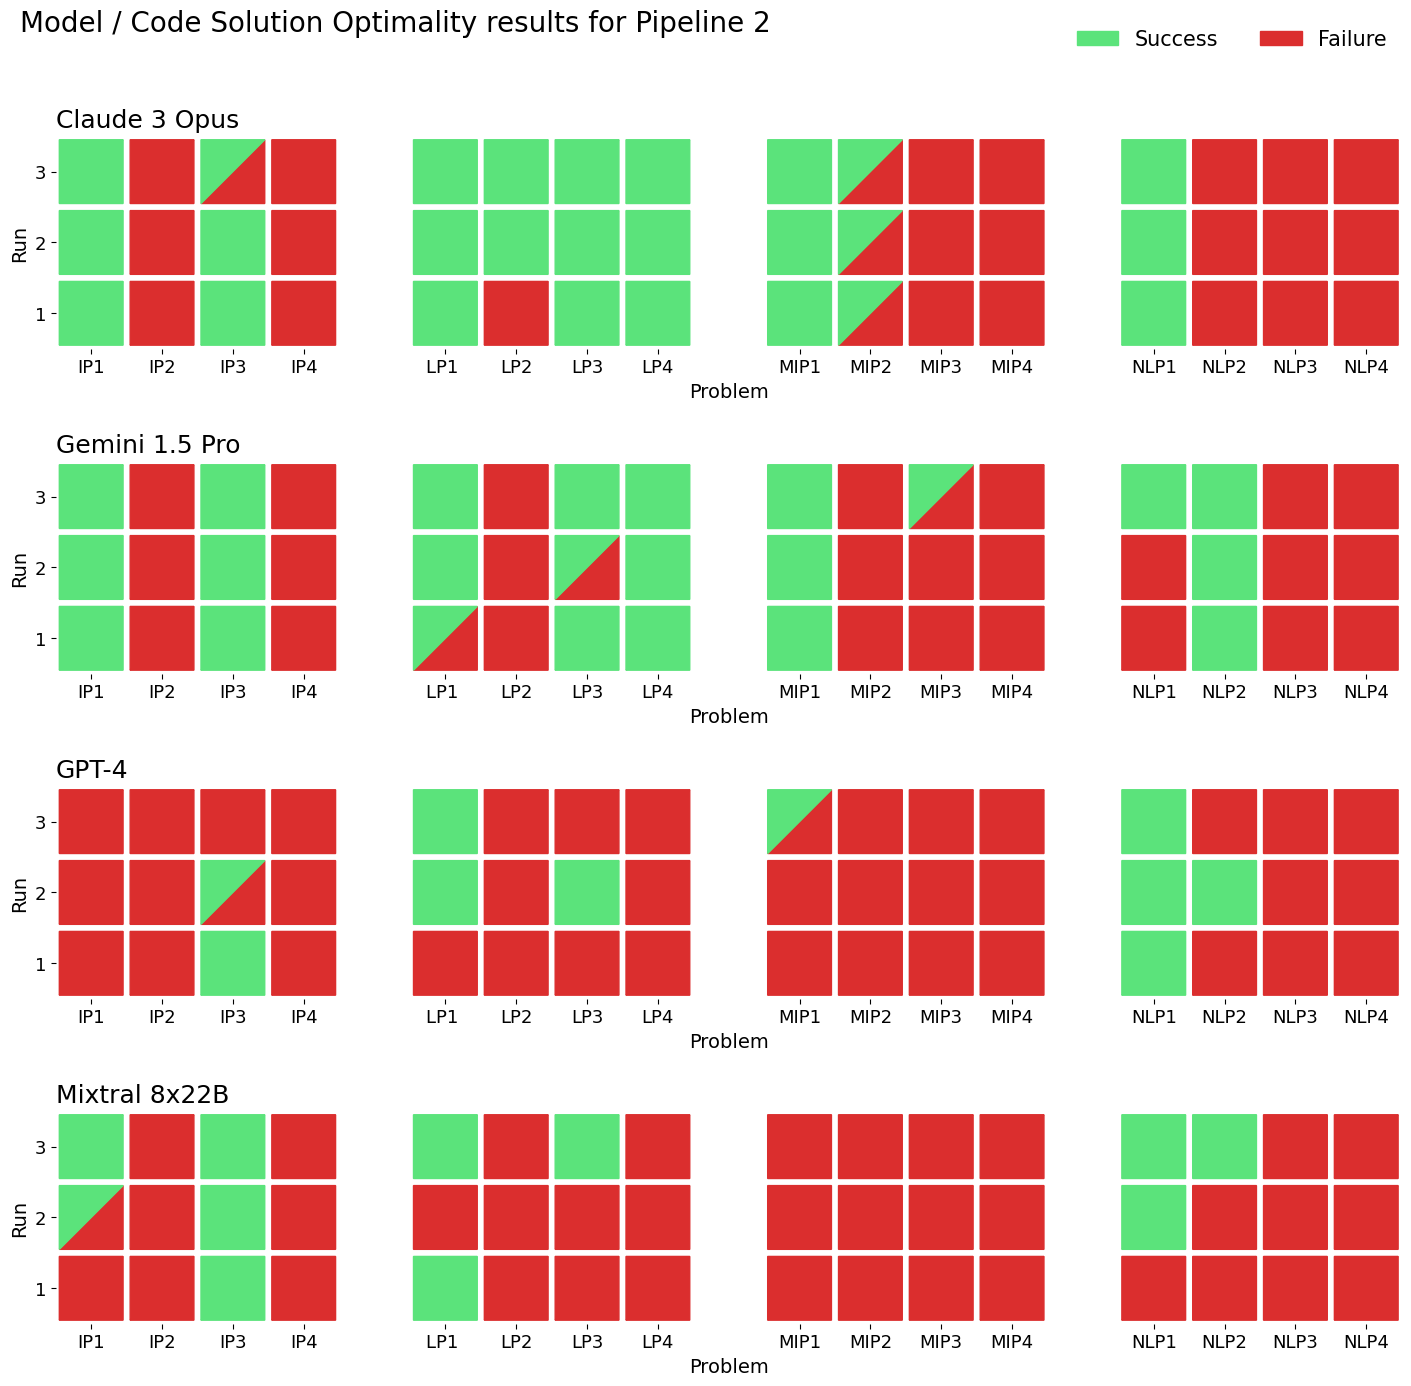

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Function to insert blank columns
def insert_blank_columns(df, interval):
    columns = list(df.columns)
    new_columns = []
    for i, col in enumerate(columns):
        if i > 0 and i % interval == 0:
            new_columns.append(f'gap_{i}')
        new_columns.append(col)
    df = df.reindex(columns=new_columns)
    return df

# Sample dataframes - replace with actual dataframes
df_chart1 = RGemini2[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]
df_chart2 = RClaude2[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]
df_chart3 = RMixtral2[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]
df_chart4 = RGPT2[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]

# Pivot and insert columns for all metrics
def process_dataframe(df):
    pivot_model = df.pivot(index='Run', columns='Problem', values='Model Solution Optimality')
    pivot_model = insert_blank_columns(pivot_model, 4)
    pivot_code = df.pivot(index='Run', columns='Problem', values='Code Solution Optimality')
    pivot_code = insert_blank_columns(pivot_code, 4)
    return pivot_model, pivot_code

pivot_model1, pivot_code1 = process_dataframe(df_chart1)
pivot_model2, pivot_code2 = process_dataframe(df_chart2)
pivot_model3, pivot_code3 = process_dataframe(df_chart3)
pivot_model4, pivot_code4 = process_dataframe(df_chart4)

# Colors
cmap = sns.color_palette(["#db2e2e", "#5be37b"])  # Custom red and green colors

# Function to plot a split heatmap cell for each subplot
def plot_split_heatmap(data_model, data_code, ax, cmap, gap=0.05):
    for i in range(data_model.shape[0]):
        for j in range(data_model.shape[1]):
            if str(data_model.columns[j]).startswith('gap_'):
                continue  # Skip gap columns
            color_model = cmap[data_model.iloc[i, j]]
            color_code = cmap[data_code.iloc[i, j]]
            # Adjusting for gap
            x = j + gap / 2
            y = data_model.shape[0] - i - 1 + gap / 2
            size = 1 - gap
            # Upper right triangle
            triangle_upper_right = plt.Polygon([[x + size, y + size], [x, y], [x + size, y]], color=color_model)
            # Lower left triangle
            triangle_lower_left = plt.Polygon([[x, y + size], [x + size, y + size], [x, y]], color=color_code)
            ax.add_patch(triangle_upper_right)
            ax.add_patch(triangle_lower_left)

# Create figure and axes with constrained layout to ensure equal spacing
fig, ((ax2),(ax1), (ax4), (ax3)) = plt.subplots(4, 1, figsize=(14, 13), constrained_layout=True)

# Plotting each pipeline
plot_split_heatmap(pivot_code1, pivot_model1, ax1, cmap, gap=0.1)
ax1.set_xlim(0, pivot_model1.shape[1])
ax1.set_ylim(0, pivot_model1.shape[0])
ax1.set_aspect('equal')
ax1.set_title('Gemini 1.5 Pro', fontsize=18, loc='left')
ax1.set_xlabel('Problem', fontsize=14)
ax1.set_ylabel('Run', fontsize=14)

# Center y-ticks
y_ticks = range(pivot_model1.shape[0])
y_ticklabels = range(1, pivot_model1.shape[0] + 1)
ax1.set_yticks([y + 0.5 for y in y_ticks])
ax1.set_yticklabels(y_ticklabels, fontsize=13)

# Center x-ticks
x_ticks = [i for i, label in enumerate(pivot_model1.columns) if not str(label).startswith('gap_')]
x_ticklabels = [label for label in pivot_model1.columns if not str(label).startswith('gap_')]
ax1.set_xticks([x + 0.5 for x in x_ticks])
ax1.set_xticklabels(x_ticklabels, fontsize=13)

# Remove the spines (the borders around the plot)
for spine in ax1.spines.values():
    spine.set_visible(False)

# Second subplot
plot_split_heatmap(pivot_code2, pivot_model2, ax2, cmap, gap=0.1)
ax2.set_xlim(0, pivot_model2.shape[1])
ax2.set_ylim(0, pivot_model2.shape[0])
ax2.set_aspect('equal')
ax2.set_title('Claude 3 Opus', fontsize=18, loc='left')
ax2.set_xlabel('Problem', fontsize=14)
ax2.set_ylabel('Run', fontsize=14)

# Center y-ticks
ax2.set_yticks([y + 0.5 for y in y_ticks])
ax2.set_yticklabels(y_ticklabels, fontsize=13)

# Center x-ticks
ax2.set_xticks([x + 0.5 for x in x_ticks])
ax2.set_xticklabels(x_ticklabels, fontsize=13)

# Remove the spines (the borders around the plot)
for spine in ax2.spines.values():
    spine.set_visible(False)

# Third subplot
plot_split_heatmap(pivot_code3, pivot_model3, ax3, cmap, gap=0.1)
ax3.set_xlim(0, pivot_model3.shape[1])
ax3.set_ylim(0, pivot_model3.shape[0])
ax3.set_aspect('equal')
ax3.set_title('Mixtral 8x22B', fontsize=18, loc='left')
ax3.set_xlabel('Problem', fontsize=14)
ax3.set_ylabel('Run', fontsize=14)

# Center y-ticks
ax3.set_yticks([y + 0.5 for y in y_ticks])
ax3.set_yticklabels(y_ticklabels, fontsize=13)

# Center x-ticks
ax3.set_xticks([x + 0.5 for x in x_ticks])
ax3.set_xticklabels(x_ticklabels, fontsize=13)

# Remove the spines (the borders around the plot)
for spine in ax3.spines.values():
    spine.set_visible(False)

# Fourth subplot
plot_split_heatmap(pivot_code4, pivot_model4, ax4, cmap, gap=0.1)
ax4.set_xlim(0, pivot_model4.shape[1])
ax4.set_ylim(0, pivot_model4.shape[0])
ax4.set_aspect('equal')
ax4.set_title('GPT-4', fontsize=18, loc='left')
ax4.set_xlabel('Problem', fontsize=14)
ax4.set_ylabel('Run', fontsize=14)

# Center y-ticks
ax4.set_yticks([y + 0.5 for y in y_ticks])
ax4.set_yticklabels(y_ticklabels, fontsize=13)

# Center x-ticks
ax4.set_xticks([x + 0.5 for x in x_ticks])
ax4.set_xticklabels(x_ticklabels, fontsize=13)

# Remove the spines (the borders around the plot)
for spine in ax4.spines.values():
    spine.set_visible(False)

# Title
fig.text(0.01, 1.05, 'Model / Code Solution Optimality results for Pipeline 2', fontsize=20, ha='left', va='center')

# Legend
success_patch = mpatches.Patch(color='#5be37b', label='Success')
failure_patch = mpatches.Patch(color='#db2e2e', label='Failure')
fig.legend(handles=[success_patch, failure_patch], loc='upper right', bbox_to_anchor=(1, 1.06), ncol=2, frameon=False, fontsize=15)

plt.show()


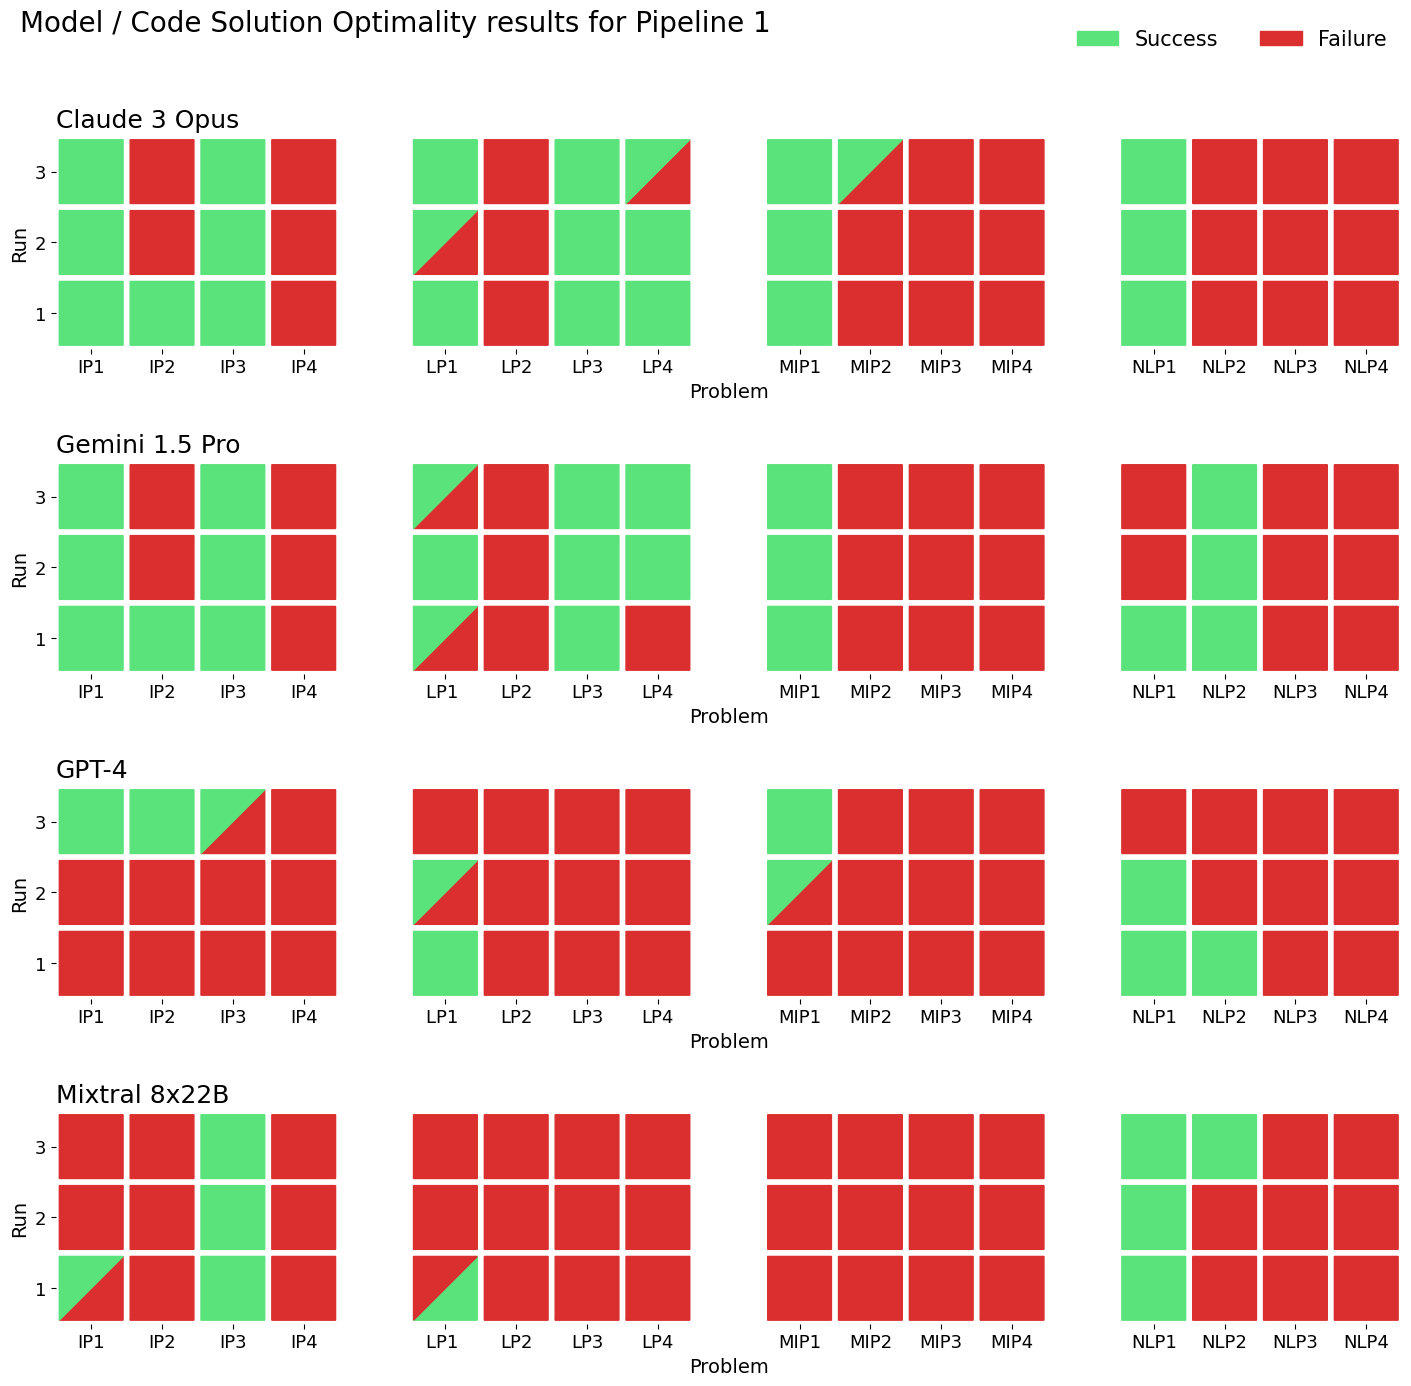

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Function to insert blank columns
def insert_blank_columns(df, interval):
    columns = list(df.columns)
    new_columns = []
    for i, col in enumerate(columns):
        if i > 0 and i % interval == 0:
            new_columns.append(f'gap_{i}')
        new_columns.append(col)
    df = df.reindex(columns=new_columns)
    return df

# Sample dataframes - replace with actual dataframes
df_chart1 = RGemini1[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]
df_chart2 = RClaude1[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]
df_chart3 = RMixtral1[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]
df_chart4 = RGPT1[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]

# Pivot and insert columns for all metrics
def process_dataframe(df):
    pivot_model = df.pivot(index='Run', columns='Problem', values='Model Solution Optimality')
    pivot_model = insert_blank_columns(pivot_model, 4)
    pivot_code = df.pivot(index='Run', columns='Problem', values='Code Solution Optimality')
    pivot_code = insert_blank_columns(pivot_code, 4)
    return pivot_model, pivot_code

pivot_model1, pivot_code1 = process_dataframe(df_chart1)
pivot_model2, pivot_code2 = process_dataframe(df_chart2)
pivot_model3, pivot_code3 = process_dataframe(df_chart3)
pivot_model4, pivot_code4 = process_dataframe(df_chart4)

# Colors
cmap = sns.color_palette(["#db2e2e", "#5be37b"])  # Custom red and green colors

# Function to plot a split heatmap cell for each subplot
def plot_split_heatmap(data_model, data_code, ax, cmap, gap=0.05):
    for i in range(data_model.shape[0]):
        for j in range(data_model.shape[1]):
            if str(data_model.columns[j]).startswith('gap_'):
                continue  # Skip gap columns
            color_model = cmap[data_model.iloc[i, j]]
            color_code = cmap[data_code.iloc[i, j]]
            # Adjusting for gap
            x = j + gap / 2
            y = data_model.shape[0] - i - 1 + gap / 2
            size = 1 - gap
            # Upper right triangle
            triangle_upper_right = plt.Polygon([[x + size, y + size], [x, y], [x + size, y]], color=color_model)
            # Lower left triangle
            triangle_lower_left = plt.Polygon([[x, y + size], [x + size, y + size], [x, y]], color=color_code)
            ax.add_patch(triangle_upper_right)
            ax.add_patch(triangle_lower_left)

# Create figure and axes with constrained layout to ensure equal spacing
fig, ((ax2),(ax1), (ax4), (ax3)) = plt.subplots(4, 1, figsize=(14, 13), constrained_layout=True)

# Plotting each pipeline
plot_split_heatmap(pivot_code1, pivot_model1, ax1, cmap, gap=0.1)
ax1.set_xlim(0, pivot_model1.shape[1])
ax1.set_ylim(0, pivot_model1.shape[0])
ax1.set_aspect('equal')
ax1.set_title('Gemini 1.5 Pro', fontsize=18, loc='left')
ax1.set_xlabel('Problem', fontsize=14)
ax1.set_ylabel('Run', fontsize=14)

# Center y-ticks
y_ticks = range(pivot_model1.shape[0])
y_ticklabels = range(1, pivot_model1.shape[0] + 1)
ax1.set_yticks([y + 0.5 for y in y_ticks])
ax1.set_yticklabels(y_ticklabels, fontsize=13)

# Center x-ticks
x_ticks = [i for i, label in enumerate(pivot_model1.columns) if not str(label).startswith('gap_')]
x_ticklabels = [label for label in pivot_model1.columns if not str(label).startswith('gap_')]
ax1.set_xticks([x + 0.5 for x in x_ticks])
ax1.set_xticklabels(x_ticklabels, fontsize=13)

# Remove the spines (the borders around the plot)
for spine in ax1.spines.values():
    spine.set_visible(False)

# Second subplot
plot_split_heatmap(pivot_code2, pivot_model2, ax2, cmap, gap=0.1)
ax2.set_xlim(0, pivot_model2.shape[1])
ax2.set_ylim(0, pivot_model2.shape[0])
ax2.set_aspect('equal')
ax2.set_title('Claude 3 Opus', fontsize=18, loc='left')
ax2.set_xlabel('Problem', fontsize=14)
ax2.set_ylabel('Run', fontsize=14)

# Center y-ticks
ax2.set_yticks([y + 0.5 for y in y_ticks])
ax2.set_yticklabels(y_ticklabels, fontsize=13)

# Center x-ticks
ax2.set_xticks([x + 0.5 for x in x_ticks])
ax2.set_xticklabels(x_ticklabels, fontsize=13)

# Remove the spines (the borders around the plot)
for spine in ax2.spines.values():
    spine.set_visible(False)

# Third subplot
plot_split_heatmap(pivot_code3, pivot_model3, ax3, cmap, gap=0.1)
ax3.set_xlim(0, pivot_model3.shape[1])
ax3.set_ylim(0, pivot_model3.shape[0])
ax3.set_aspect('equal')
ax3.set_title('Mixtral 8x22B', fontsize=18, loc='left')
ax3.set_xlabel('Problem', fontsize=14)
ax3.set_ylabel('Run', fontsize=14)

# Center y-ticks
ax3.set_yticks([y + 0.5 for y in y_ticks])
ax3.set_yticklabels(y_ticklabels, fontsize=13)

# Center x-ticks
ax3.set_xticks([x + 0.5 for x in x_ticks])
ax3.set_xticklabels(x_ticklabels, fontsize=13)

# Remove the spines (the borders around the plot)
for spine in ax3.spines.values():
    spine.set_visible(False)

# Fourth subplot
plot_split_heatmap(pivot_code4, pivot_model4, ax4, cmap, gap=0.1)
ax4.set_xlim(0, pivot_model4.shape[1])
ax4.set_ylim(0, pivot_model4.shape[0])
ax4.set_aspect('equal')
ax4.set_title('GPT-4', fontsize=18, loc='left')
ax4.set_xlabel('Problem', fontsize=14)
ax4.set_ylabel('Run', fontsize=14)

# Center y-ticks
ax4.set_yticks([y + 0.5 for y in y_ticks])
ax4.set_yticklabels(y_ticklabels, fontsize=13)

# Center x-ticks
ax4.set_xticks([x + 0.5 for x in x_ticks])
ax4.set_xticklabels(x_ticklabels, fontsize=13)

# Remove the spines (the borders around the plot)
for spine in ax4.spines.values():
    spine.set_visible(False)

# Title
fig.text(0.01, 1.05, 'Model / Code Solution Optimality results for Pipeline 1', fontsize=20, ha='left', va='center')

# Legend
success_patch = mpatches.Patch(color='#5be37b', label='Success')
failure_patch = mpatches.Patch(color='#db2e2e', label='Failure')
fig.legend(handles=[success_patch, failure_patch], loc='upper right', bbox_to_anchor=(1, 1.06), ncol=2, frameon=False, fontsize=15)

plt.show()


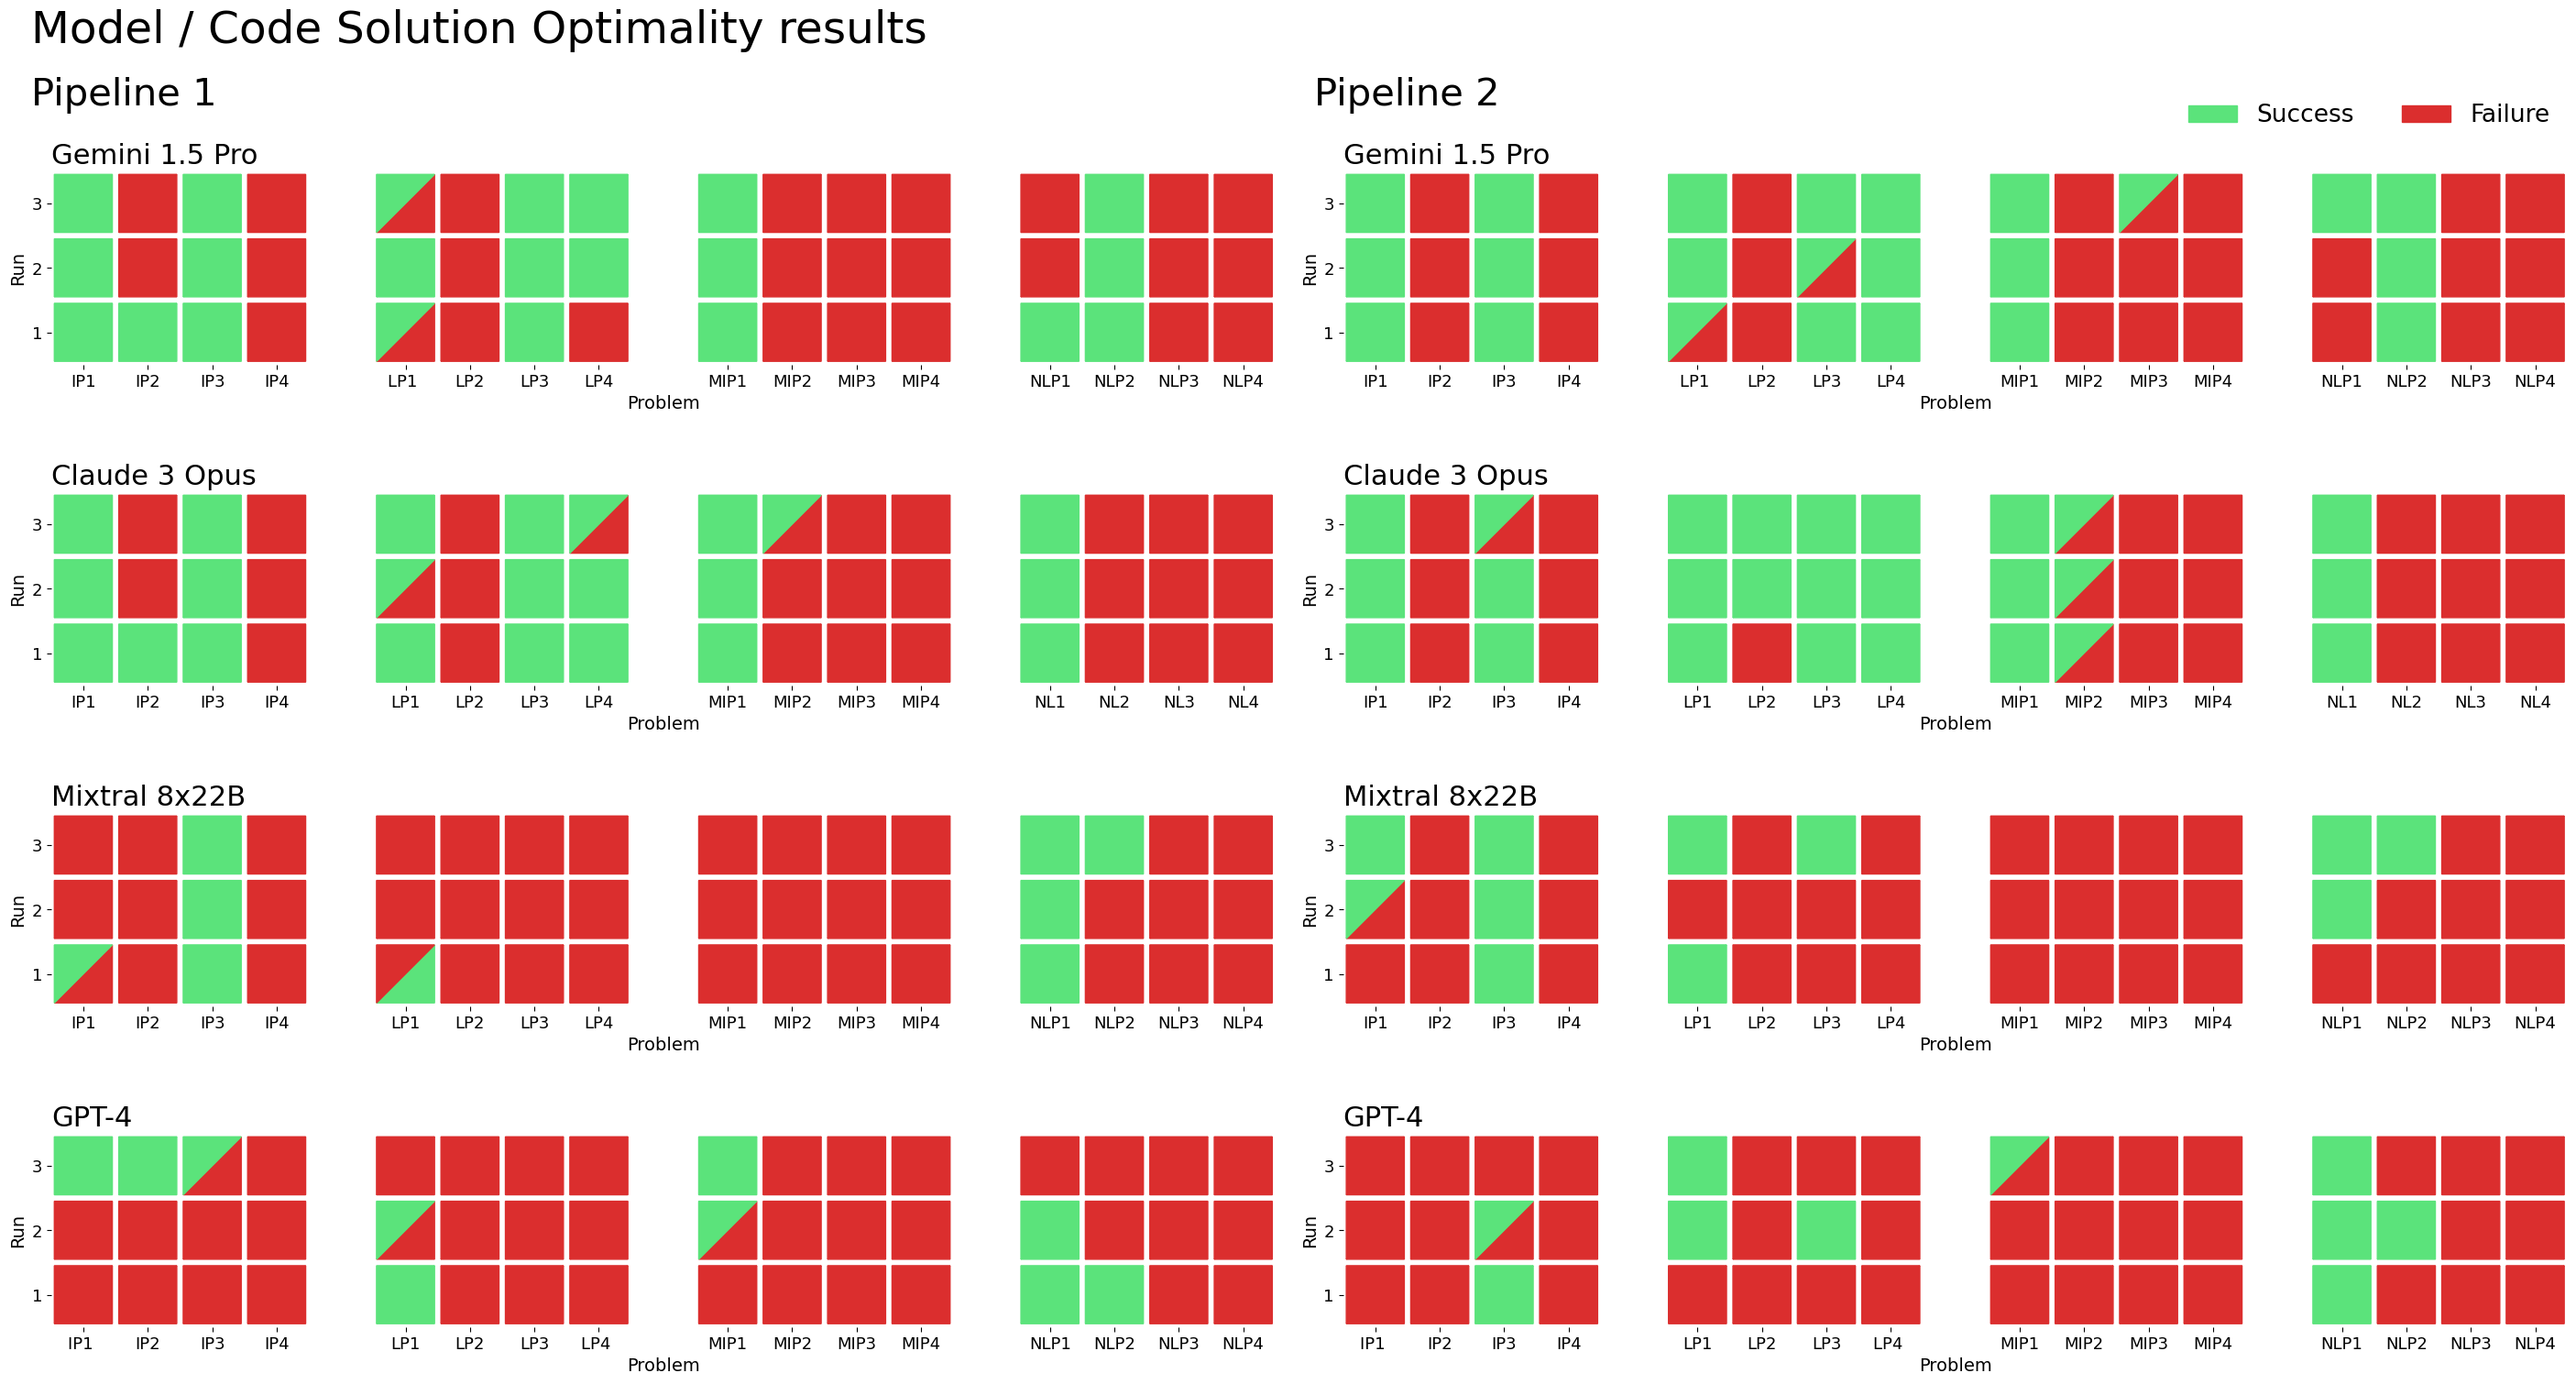

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Function to insert blank columns
def insert_blank_columns(df, interval):
    columns = list(df.columns)
    new_columns = []
    for i, col in enumerate(columns):
        if i > 0 and i % interval == 0:
            new_columns.append(f'gap_{i}')
        new_columns.append(col)
    df = df.reindex(columns=new_columns)
    return df

# Sample dataframes - replace with actual dataframes
df_chart1_left = RGemini1[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]
df_chart2_left = RClaude1[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]
df_chart3_left = RMixtral1[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]
df_chart4_left = RGPT1[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]

df_chart1_right = RGemini2[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]
df_chart2_right = RClaude2[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]
df_chart3_right = RMixtral2[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]
df_chart4_right = RGPT2[['Problem', 'Run', 'Model Solution Optimality', 'Code Solution Optimality']]

# Pivot and insert columns for all metrics
def process_dataframe(df):
    pivot_model = df.pivot(index='Run', columns='Problem', values='Model Solution Optimality')
    pivot_model = insert_blank_columns(pivot_model, 4)
    pivot_code = df.pivot(index='Run', columns='Problem', values='Code Solution Optimality')
    pivot_code = insert_blank_columns(pivot_code, 4)
    return pivot_model, pivot_code

pivot_model1_left, pivot_code1_left = process_dataframe(df_chart1_left)
pivot_model2_left, pivot_code2_left = process_dataframe(df_chart2_left)
pivot_model3_left, pivot_code3_left = process_dataframe(df_chart3_left)
pivot_model4_left, pivot_code4_left = process_dataframe(df_chart4_left)

pivot_model1_right, pivot_code1_right = process_dataframe(df_chart1_right)
pivot_model2_right, pivot_code2_right = process_dataframe(df_chart2_right)
pivot_model3_right, pivot_code3_right = process_dataframe(df_chart3_right)
pivot_model4_right, pivot_code4_right = process_dataframe(df_chart4_right)

# Colors
cmap = sns.color_palette(["#db2e2e", "#5be37b"])  # Custom red and green colors

# Function to plot a split heatmap cell for each subplot
def plot_split_heatmap(data_model, data_code, ax, cmap, gap=0.05):
    for i in range(data_model.shape[0]):
        for j in range(data_model.shape[1]):
            if str(data_model.columns[j]).startswith('gap_'):
                continue  # Skip gap columns
            color_model = cmap[data_model.iloc[i, j]]
            color_code = cmap[data_code.iloc[i, j]]
            # Adjusting for gap
            x = j + gap / 2
            y = data_model.shape[0] - i - 1 + gap / 2
            size = 1 - gap
            # Upper right triangle
            triangle_upper_right = plt.Polygon([[x + size, y + size], [x, y], [x + size, y]], color=color_model)
            # Lower left triangle
            triangle_lower_left = plt.Polygon([[x, y + size], [x + size, y + size], [x, y]], color=color_code)
            ax.add_patch(triangle_upper_right)
            ax.add_patch(triangle_lower_left)

# Create figure and axes with constrained layout to ensure equal spacing
fig, axes = plt.subplots(4, 2, figsize=(28, 14), constrained_layout=True)

# Titles and data for the left side (Pipeline 1)
titles_left = ['Gemini 1.5 Pro', 'Claude 3 Opus', 'Mixtral 8x22B', 'GPT-4']
data_left = [
    (pivot_code1_left, pivot_model1_left),
    (pivot_code2_left, pivot_model2_left),
    (pivot_code3_left, pivot_model3_left),
    (pivot_code4_left, pivot_model4_left)
]

# Titles and data for the right side (Pipeline 2)
titles_right = ['Gemini 1.5 Pro', 'Claude 3 Opus', 'Mixtral 8x22B', 'GPT-4']
data_right = [
    (pivot_code1_right, pivot_model1_right),
    (pivot_code2_right, pivot_model2_right),
    (pivot_code3_right, pivot_model3_right),
    (pivot_code4_right, pivot_model4_right)
]

# Plotting each pipeline on the left
for i, (title, (data_code, data_model)) in enumerate(zip(titles_left, data_left)):
    ax = axes[i, 0]
    plot_split_heatmap(data_code, data_model, ax, cmap, gap=0.1)
    ax.set_xlim(0, data_model.shape[1])
    ax.set_ylim(0, data_model.shape[0])
    ax.set_aspect('equal')
    ax.set_title(title, fontsize=22, loc='left')
    ax.set_xlabel('Problem', fontsize=14)
    ax.set_ylabel('Run', fontsize=14)

    # Center y-ticks
    y_ticks = range(data_model.shape[0])
    y_ticklabels = range(1, data_model.shape[0] + 1)
    ax.set_yticks([y + 0.5 for y in y_ticks])
    ax.set_yticklabels(y_ticklabels, fontsize=13)

    # Center x-ticks
    x_ticks = [j for j, label in enumerate(data_model.columns) if not str(label).startswith('gap_')]
    x_ticklabels = [label for label in data_model.columns if not str(label).startswith('gap_')]
    ax.set_xticks([x + 0.5 for x in x_ticks])
    ax.set_xticklabels(x_ticklabels, fontsize=13)

    # Remove the spines (the borders around the plot)
    for spine in ax.spines.values():
        spine.set_visible(False)

# Plotting each pipeline on the right
for i, (title, (data_code, data_model)) in enumerate(zip(titles_right, data_right)):
    ax = axes[i, 1]
    plot_split_heatmap(data_code, data_model, ax, cmap, gap=0.1)
    ax.set_xlim(0, data_model.shape[1])
    ax.set_ylim(0, data_model.shape[0])
    ax.set_aspect('equal')
    ax.set_title(title, fontsize=22, loc='left')
    ax.set_xlabel('Problem', fontsize=14)
    ax.set_ylabel('Run', fontsize=14)

    # Center y-ticks
    y_ticks = range(data_model.shape[0])
    y_ticklabels = range(1, data_model.shape[0] + 1)
    ax.set_yticks([y + 0.5 for y in y_ticks])
    ax.set_yticklabels(y_ticklabels, fontsize=13)

    # Center x-ticks
    x_ticks = [j for j, label in enumerate(data_model.columns) if not str(label).startswith('gap_')]
    x_ticklabels = [label for label in data_model.columns if not str(label).startswith('gap_')]
    ax.set_xticks([x + 0.5 for x in x_ticks])
    ax.set_xticklabels(x_ticklabels, fontsize=13)

    # Remove the spines (the borders around the plot)
    for spine in ax.spines.values():
        spine.set_visible(False)

# Titles
fig.text(0.01, 1.01, 'Pipeline 1', fontsize=30, ha='left', va='center')
fig.text(0.51, 1.01, 'Pipeline 2', fontsize=30, ha='left', va='center')
fig.text(0.01, 1.06,'Model / Code Solution Optimality results', fontsize=35, ha='left', va='center')
# Legend
success_patch = mpatches.Patch(color='#5be37b', label='Success')
failure_patch = mpatches.Patch(color='#db2e2e', label='Failure')
fig.legend(handles=[success_patch, failure_patch], loc='upper right', bbox_to_anchor=(1, 1.02), ncol=2, frameon=False, fontsize=19)

plt.show()
